# Question?

### Can you estiamate  price by its commodity, category or province?



# Data Acquisition
### https://www.kaggle.com/datasets/amaanfaheem/pakistan-food-prices-2022

### About Dataset
This dataset contains Food Prices data for Pakistan, sourced from the World Food Programmed Price Database. The World Food Programmed Price Database covers foods such as maize, rice, beans, fish, and sugar for 98 countries and some 3000 markets. It is updated weekly but contains to a large extent monthly data. The data goes back as far.

### Let us import the necessary liabraries and read our DataSet

In [820]:
# just get rid of errors
import warnings
warnings.simplefilter("ignore")

In [821]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import linear_model, svm

## Extract, Transform, Load and Data wrangling

### Extraction

In [822]:
df = pd.read_csv("Pakistan_Food_Prices.csv") # reading from CSV

In [823]:
df

date      Provinces name City Name City market   latitude  \
0     1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222   
1     1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222   
2     1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
3     1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
4     1/15/2004              PUNJAB    Lahore      Lahore  31.549722   
...         ...                 ...       ...         ...        ...   
9718  9/15/2022               SINDH   Karachi     Karachi  24.905600   
9719  9/15/2022               SINDH   Karachi     Karachi  24.905600   
9720  9/15/2022               SINDH   Karachi     Karachi  24.905600   
9721  9/15/2022               SINDH   Karachi     Karachi  24.905600   
9722  9/15/2022               SINDH   Karachi     Karachi  24.905600   

      longitude            category               commodity unit price flag  \
0     67.012500  cereals and tubers  Rice (basmati, broken)   KG     actual   
1     67.012500  cereals and tubers             Wheat flour   KG     actual   
2     71.580182  cereals and tubers  Rice (basmati, broken)   KG     actual   
3     71.580182  cereals and tubers             Wheat flour   KG     actual   
4     74.343611  cereals and tubers  Rice (basmati, broken)   KG     actual   
...         ...                 ...                     ...  ...        ...   
9718  67.082200        oil and fats       Ghee (artificial)   KG     actual   
9719  67.082200        oil and fats           Oil (cooking)    L     actual   
9720  67.082200     pulses and nuts             Beans(mash)   KG     actual   
9721  67.082200     pulses and nuts         Lentils (masur)   KG     actual   
9722  67.082200     pulses and nuts         Lentils (moong)   KG     actual   

     price type currency   price  usd price  
0        Retail      PKR   20.00     0.0916  
1        Retail      PKR   13.00     0.0596  
2        Retail      PKR   17.59     0.0806  
3        Retail      PKR   12.00     0.0550  
4        Retail      PKR   19.15     0.0877  
...         ...      ...     ...        ...  
9718     Retail      PKR  553.86     2.5374  
9719     Retail      PKR  569.99     2.6113  
9720     Retail      PKR  391.45     1.7933  
9721     Retail      PKR  334.50     1.5324  
9722     Retail      PKR  265.08     1.2144  

[9723 rows x 14 columns]

In [824]:
df.columns # some names are capital letters

Index(['date', 'Provinces name', 'City Name', 'City market', 'latitude',
       'longitude', 'category', 'commodity', 'unit', 'price flag',
       'price type', 'currency', 'price', 'usd price'],
      dtype='object')

In [825]:
df.head(5) # printing first 5 rows

date      Provinces name City Name City market   latitude  longitude  \
0  1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222  67.012500   
1  1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222  67.012500   
2  1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366  71.580182   
3  1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366  71.580182   
4  1/15/2004              PUNJAB    Lahore      Lahore  31.549722  74.343611   

             category               commodity unit price flag price type  \
0  cereals and tubers  Rice (basmati, broken)   KG     actual     Retail   
1  cereals and tubers             Wheat flour   KG     actual     Retail   
2  cereals and tubers  Rice (basmati, broken)   KG     actual     Retail   
3  cereals and tubers             Wheat flour   KG     actual     Retail   
4  cereals and tubers  Rice (basmati, broken)   KG     actual     Retail   

  currency  price  usd price  
0      PKR  20.00     0.0916  
1      PKR  13.00     0.0596  
2      PKR  17.59     0.0806  
3      PKR  12.00     0.0550  
4      PKR  19.15     0.0877

In [826]:
df.tail(5) # printing last 5 rows

date Provinces name City Name City market  latitude  longitude  \
9718  9/15/2022          SINDH   Karachi     Karachi   24.9056    67.0822   
9719  9/15/2022          SINDH   Karachi     Karachi   24.9056    67.0822   
9720  9/15/2022          SINDH   Karachi     Karachi   24.9056    67.0822   
9721  9/15/2022          SINDH   Karachi     Karachi   24.9056    67.0822   
9722  9/15/2022          SINDH   Karachi     Karachi   24.9056    67.0822   

             category          commodity unit price flag price type currency  \
9718     oil and fats  Ghee (artificial)   KG     actual     Retail      PKR   
9719     oil and fats      Oil (cooking)    L     actual     Retail      PKR   
9720  pulses and nuts        Beans(mash)   KG     actual     Retail      PKR   
9721  pulses and nuts    Lentils (masur)   KG     actual     Retail      PKR   
9722  pulses and nuts    Lentils (moong)   KG     actual     Retail      PKR   

       price  usd price  
9718  553.86     2.5374  
9719  569.99     2.6113  
9720  391.45     1.7933  
9721  334.50     1.5324  
9722  265.08     1.2144

In [827]:
df.sample(5) # printing random samples

date      Provinces name City Name City market   latitude  \
8578   7/15/2021         BALOCHISTAN    Quetta      Quetta  30.187222   
1150   1/15/2011  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
6267  12/15/2018              PUNJAB    Multan      Multan  30.195556   
6096  10/15/2018              PUNJAB    Lahore      Lahore  31.549722   
1174   2/15/2011              PUNJAB    Multan      Multan  30.195556   

      longitude            category               commodity unit price flag  \
8578  67.012500  miscellaneous food                   Sugar   KG     actual   
1150  71.580182  cereals and tubers  Rice (basmati, broken)   KG     actual   
6267  71.475278            non-food  Fuel (petrol-gasoline)    L     actual   
6096  74.343611  miscellaneous food                   Sugar   KG     actual   
1174  71.475278  cereals and tubers             Wheat flour   KG     actual   

     price type currency   price  usd price  
8578     Retail      PKR  105.11     0.4815  
1150     Retail      PKR   55.83     0.2558  
6267     Retail      PKR   95.83     0.4390  
6096     Retail      PKR   56.64     0.2595  
1174     Retail      PKR   29.81     0.1366

### Data wrangling


In [828]:
df.shape # data set shape 

(9723, 14)

In [829]:
df.info() # information about data set columns, null and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            9723 non-null   object 
 1   Provinces name  9723 non-null   object 
 2   City Name       9723 non-null   object 
 3   City market     9723 non-null   object 
 4   latitude        9723 non-null   float64
 5   longitude       9723 non-null   float64
 6   category        9723 non-null   object 
 7   commodity       9723 non-null   object 
 8   unit            9723 non-null   object 
 9   price flag      9723 non-null   object 
 10  price type      9723 non-null   object 
 11  currency        9723 non-null   object 
 12  price           9723 non-null   float64
 13  usd price       9723 non-null   float64
dtypes: float64(4), object(10)
memory usage: 1.0+ MB


In [830]:
df.describe()

latitude    longitude        price    usd price
count  9723.000000  9723.000000  9723.000000  9723.000000
mean     30.165392    70.333449   142.025046     0.650650
std       3.000443     2.843966   164.049134     0.751547
min      24.905600    67.012500     9.000000     0.041200
25%      30.187222    67.082200    49.000000     0.224500
50%      30.195556    71.475278    94.790000     0.434300
75%      31.549722    71.580182   176.600000     0.809000
max      34.008366    74.343611  1343.000000     6.152600

In [831]:
df.columns

Index(['date', 'Provinces name', 'City Name', 'City market', 'latitude',
       'longitude', 'category', 'commodity', 'unit', 'price flag',
       'price type', 'currency', 'price', 'usd price'],
      dtype='object')

In [832]:
df["Provinces name"].describe()

count       9723
unique         4
top       PUNJAB
freq        3923
Name: Provinces name, dtype: object

In [833]:
df["commodity"].describe()

count                       9723
unique                        17
top       Rice (basmati, broken)
freq                        1125
Name: commodity, dtype: object

In [834]:
df["City market"].describe()

count        9723
unique          5
top       Karachi
freq         1976
Name: City market, dtype: object

In [835]:
df.isnull().sum() # no null values

date              0
Provinces name    0
City Name         0
City market       0
latitude          0
longitude         0
category          0
commodity         0
unit              0
price flag        0
price type        0
currency          0
price             0
usd price         0
dtype: int64

In [836]:
df["City market"].value_counts()

City market
Karachi     1976
Lahore      1970
Peshawar    1969
Multan      1953
Quetta      1855
Name: count, dtype: int64

In [837]:
df["commodity"].value_counts()

commodity
Rice (basmati, broken)                           1125
Wheat flour                                      1023
Wheat                                             902
Poultry                                           567
Sugar                                             567
Oil (cooking)                                     567
Ghee (artificial)                                 565
Fuel (diesel)                                     525
Beans(mash)                                       500
Wage (non-qualified labour, non-agricultural)     488
Lentils (masur)                                   488
Eggs                                              473
Fuel (petrol-gasoline)                            470
Lentils (moong)                                   450
Milk                                              440
Rice (coarse)                                     368
Salt                                              205
Name: count, dtype: int64

In [838]:
df.duplicated().sum() # no duplicated values

0

In [839]:
df.drop(['usd price','price flag','price type','currency'],axis=1,inplace=True)  # dropping uncessory columns
# if you run more than one time it will give you error

In [840]:
df

date      Provinces name City Name City market   latitude  \
0     1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222   
1     1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222   
2     1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
3     1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
4     1/15/2004              PUNJAB    Lahore      Lahore  31.549722   
...         ...                 ...       ...         ...        ...   
9718  9/15/2022               SINDH   Karachi     Karachi  24.905600   
9719  9/15/2022               SINDH   Karachi     Karachi  24.905600   
9720  9/15/2022               SINDH   Karachi     Karachi  24.905600   
9721  9/15/2022               SINDH   Karachi     Karachi  24.905600   
9722  9/15/2022               SINDH   Karachi     Karachi  24.905600   

      longitude            category               commodity unit   price  
0     67.012500  cereals and tubers  Rice (basmati, broken)   KG   20.00  
1     67.012500  cereals and tubers             Wheat flour   KG   13.00  
2     71.580182  cereals and tubers  Rice (basmati, broken)   KG   17.59  
3     71.580182  cereals and tubers             Wheat flour   KG   12.00  
4     74.343611  cereals and tubers  Rice (basmati, broken)   KG   19.15  
...         ...                 ...                     ...  ...     ...  
9718  67.082200        oil and fats       Ghee (artificial)   KG  553.86  
9719  67.082200        oil and fats           Oil (cooking)    L  569.99  
9720  67.082200     pulses and nuts             Beans(mash)   KG  391.45  
9721  67.082200     pulses and nuts         Lentils (masur)   KG  334.50  
9722  67.082200     pulses and nuts         Lentils (moong)   KG  265.08  

[9723 rows x 10 columns]

In [841]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [842]:
df

date      Provinces name City Name City market   latitude  \
0     1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222   
1     1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222   
2     1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
3     1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
4     1/15/2004              PUNJAB    Lahore      Lahore  31.549722   
...         ...                 ...       ...         ...        ...   
9718  9/15/2022               SINDH   Karachi     Karachi  24.905600   
9719  9/15/2022               SINDH   Karachi     Karachi  24.905600   
9720  9/15/2022               SINDH   Karachi     Karachi  24.905600   
9721  9/15/2022               SINDH   Karachi     Karachi  24.905600   
9722  9/15/2022               SINDH   Karachi     Karachi  24.905600   

      longitude            category               commodity unit   price  year  
0     67.012500  cereals and tubers  Rice (basmati, broken)   KG   20.00  2004  
1     67.012500  cereals and tubers             Wheat flour   KG   13.00  2004  
2     71.580182  cereals and tubers  Rice (basmati, broken)   KG   17.59  2004  
3     71.580182  cereals and tubers             Wheat flour   KG   12.00  2004  
4     74.343611  cereals and tubers  Rice (basmati, broken)   KG   19.15  2004  
...         ...                 ...                     ...  ...     ...   ...  
9718  67.082200        oil and fats       Ghee (artificial)   KG  553.86  2022  
9719  67.082200        oil and fats           Oil (cooking)    L  569.99  2022  
9720  67.082200     pulses and nuts             Beans(mash)   KG  391.45  2022  
9721  67.082200     pulses and nuts         Lentils (masur)   KG  334.50  2022  
9722  67.082200     pulses and nuts         Lentils (moong)   KG  265.08  2022  

[9723 rows x 11 columns]

In [843]:
time = df["date"].str.split("/", expand=True)
df[["month", "day", "year"]] = time.astype(int)

In [844]:
cols = df[['Provinces name', 'City Name', 'City market', 'category', 'commodity']]

for i in cols.columns:
    print("\n", df[i].unique())    


 ['BALOCHISTAN' 'KHYBER PAKHTUNKHWA' 'PUNJAB' 'SINDH']

 ['Quetta' 'Peshawar' 'Lahore' 'Multan' 'Karachi']

 ['Quetta' 'Peshawar' 'Lahore' 'Multan' 'Karachi']

 ['cereals and tubers' 'meat, fish and eggs' 'miscellaneous food'
 'oil and fats' 'non-food' 'pulses and nuts' 'milk and dairy']

 ['Rice (basmati, broken)' 'Wheat flour' 'Wheat' 'Rice (coarse)' 'Poultry'
 'Sugar' 'Ghee (artificial)' 'Oil (cooking)' 'Eggs'
 'Wage (non-qualified labour, non-agricultural)' 'Lentils (masur)'
 'Fuel (diesel)' 'Beans(mash)' 'Milk' 'Salt' 'Fuel (petrol-gasoline)'
 'Lentils (moong)']


### Data visualization

In [845]:
map = px.scatter_mapbox(df, lat="latitude", lon="longitude",size='price',color='price',hover_data=["price", "commodity"])

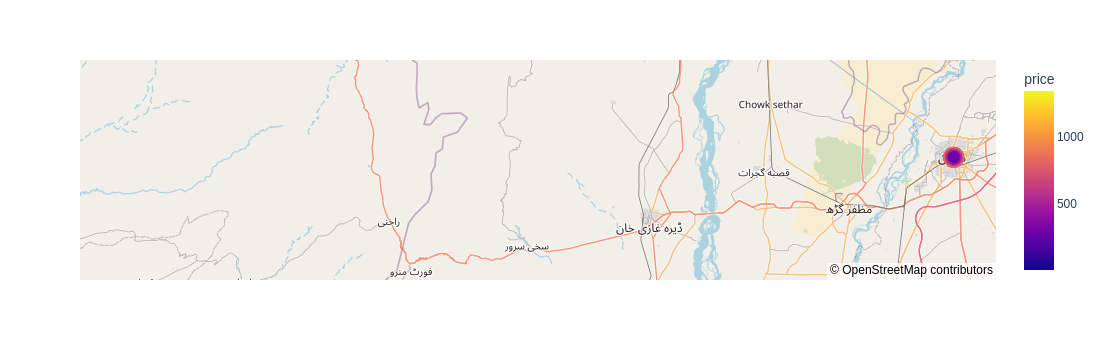

In [846]:
map.update_layout(mapbox_style="open-street-map") 

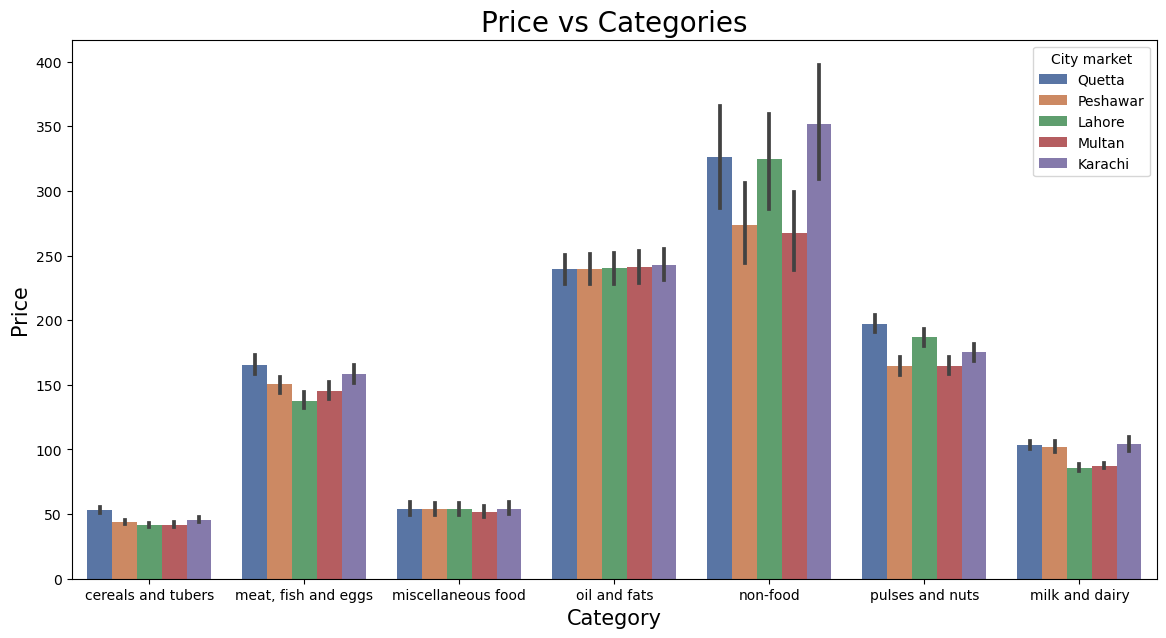

In [847]:
fig = plt.subplots(figsize=(14, 7))
sns.barplot(x = df["category"], y = df["price"], hue = df["City market"], palette="deep")
plt.xticks(rotation=0);
plt.xlabel("Category", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price vs Categories", fontsize=20)
plt.savefig('sample_plot.png')


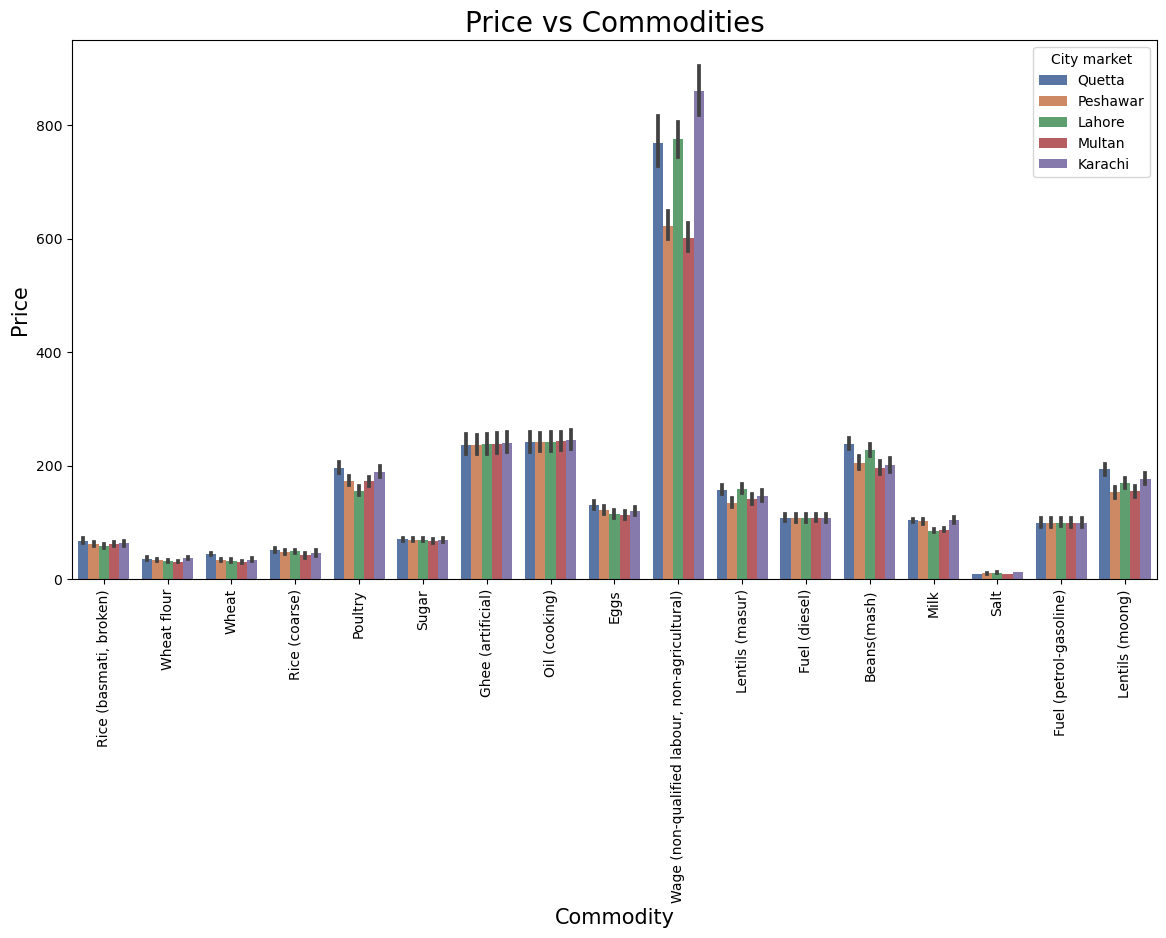

In [848]:
fig = plt.subplots(figsize=(14, 7))
sns.barplot(x=df["commodity"], y=df["price"], hue=df["City market"],palette="deep")
plt.xticks(rotation=90);
plt.xlabel("Commodity", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price vs Commodities", fontsize=20)
plt.savefig('Price vs Commodities.png')

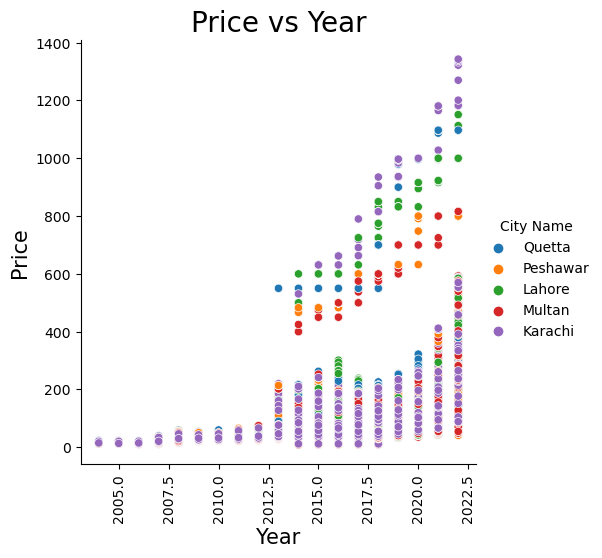

In [849]:
df["year"].astype("int")
sns.relplot(x=df["year"], y=df["price"], hue=df["City Name"])
plt.xticks(rotation=90);
plt.xlabel("Year", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price vs Year", fontsize=20)
plt.savefig('Price vs Year.png')

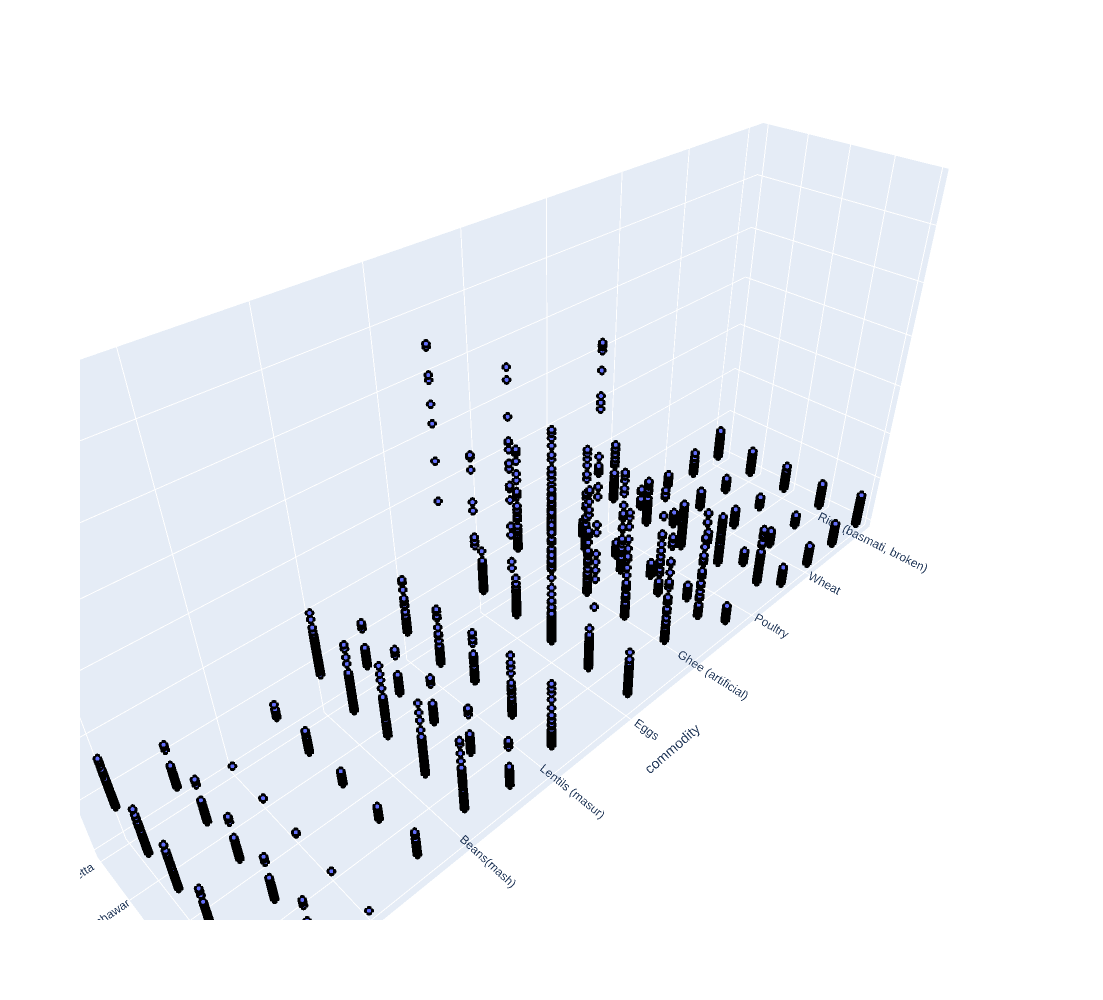

In [850]:
# Create 3D scatter plot
fig = px.scatter_3d(df, x="commodity", y="City market", z="price",
    #labels={"lon": "longitude", "lat": "latitude", "price": "price"},
    width=1000,
    height=1000,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 3, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()


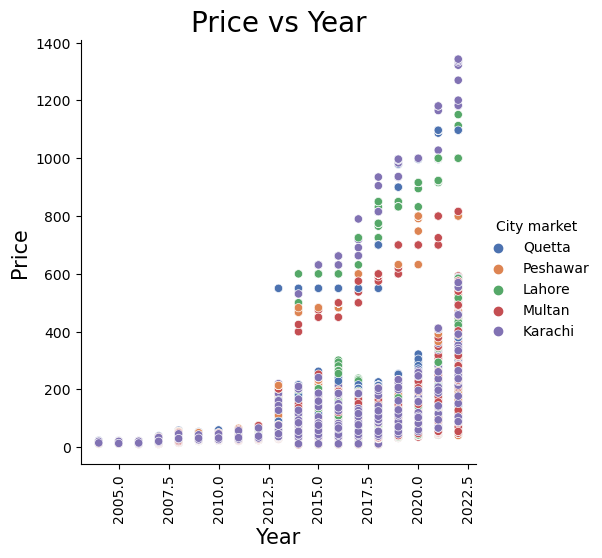

In [851]:
#fig = plt.subplots(figsize=(16, 9))
sns.relplot(x=df["year"], y=df["price"], hue=df["City market"],palette="deep")
plt.xticks(rotation=90);
plt.xlabel("Year", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price vs Year", fontsize=20)
plt.savefig('Price vs Year.png')
plt.show()

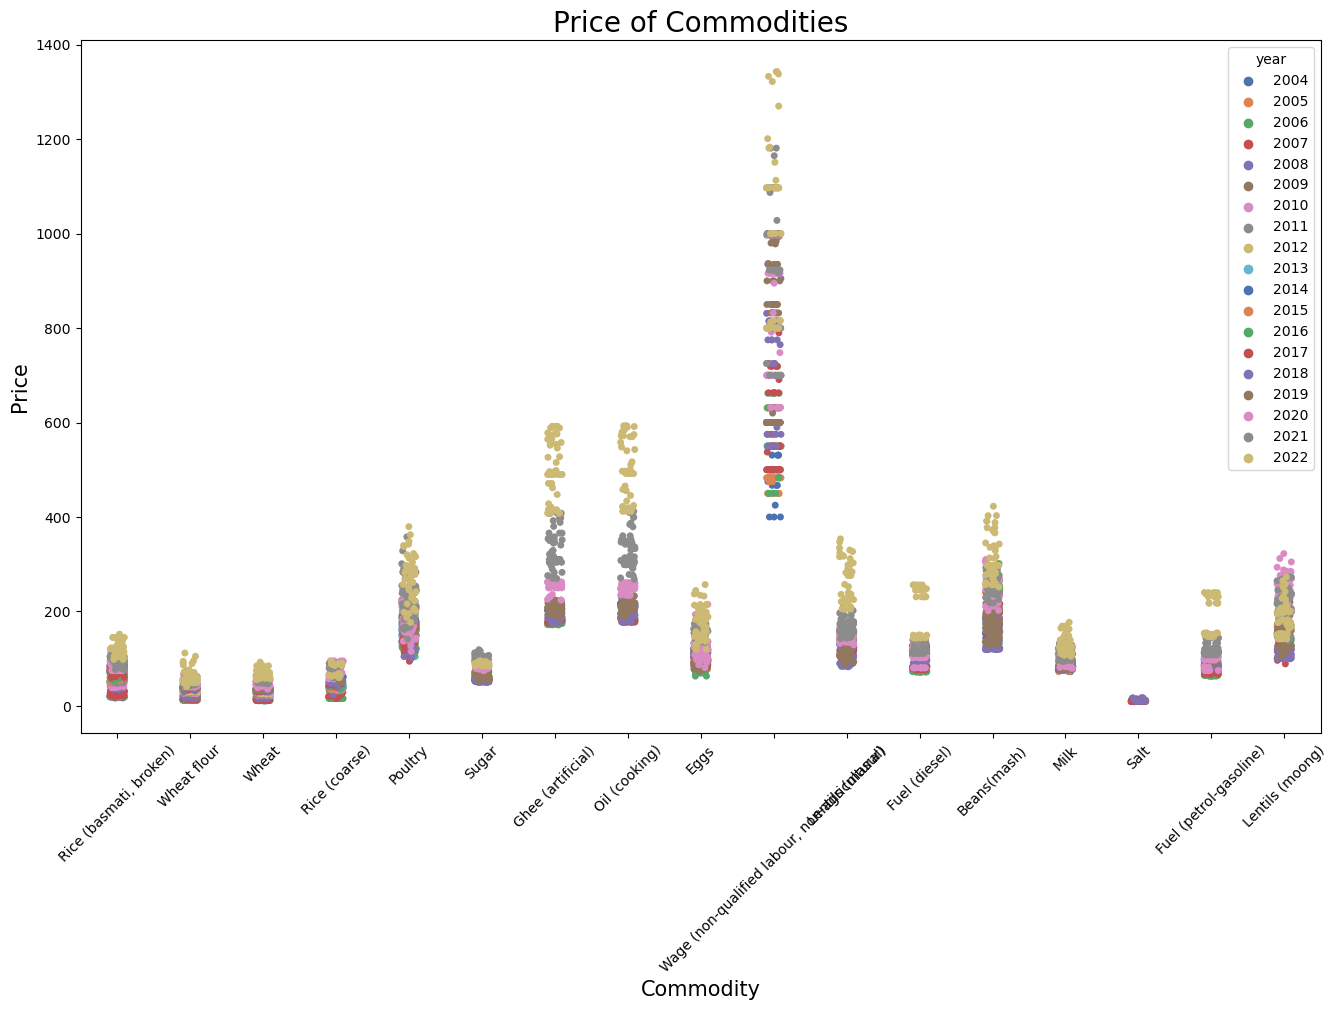

In [852]:
fig = plt.subplots(figsize=(16, 9))
sns.stripplot(x=df["commodity"], y=df["price"], hue=df["year"],palette="deep")
plt.xticks(rotation=45);
plt.xlabel("Commodity", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price of Commodities", fontsize=20)
plt.savefig('Price vs Commodities.png')
plt.show()

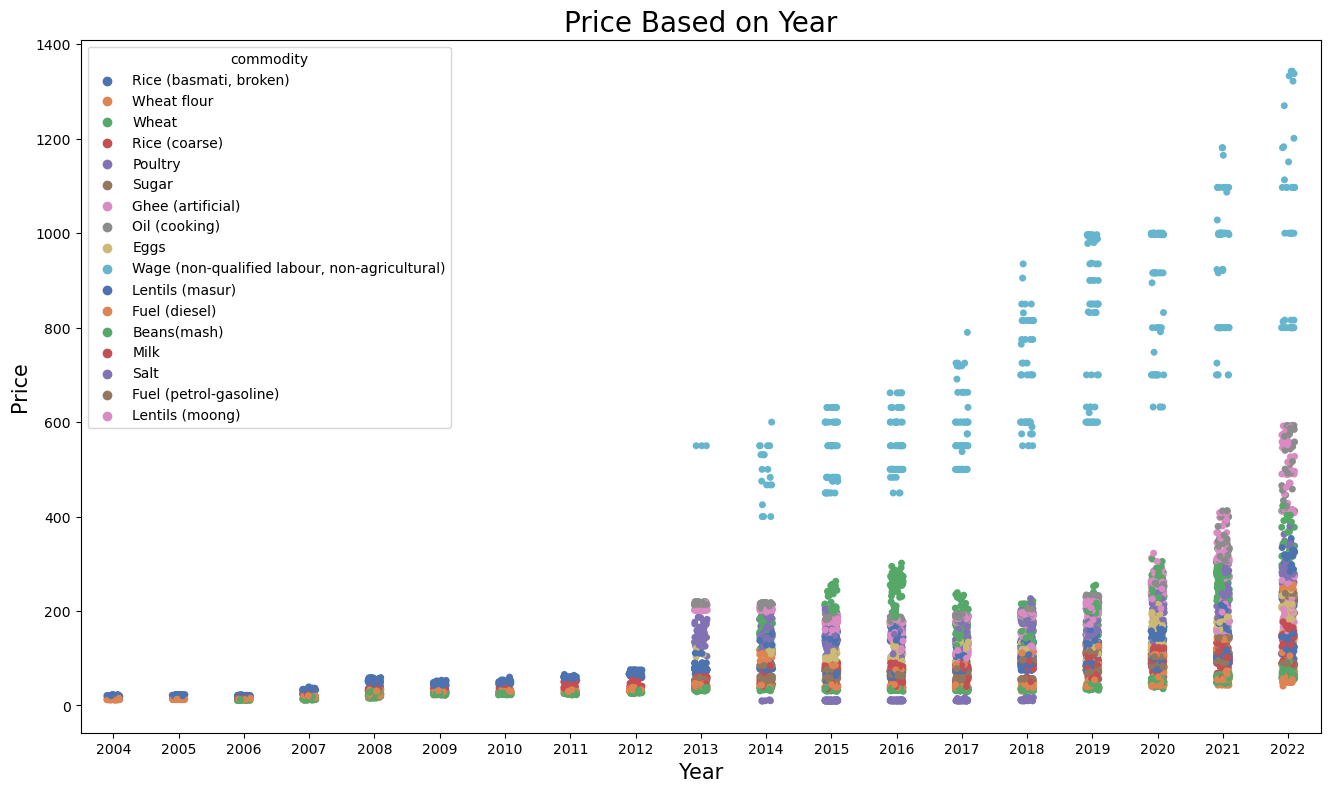

In [853]:
fig = plt.subplots(figsize=(16, 9))
sns.stripplot(x=df["year"], y=df["price"], hue=df["commodity"],palette="deep")
plt.xlabel("Year", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price Based on Year", fontsize=20)
plt.savefig('Price Based on Year.png')
plt.show()

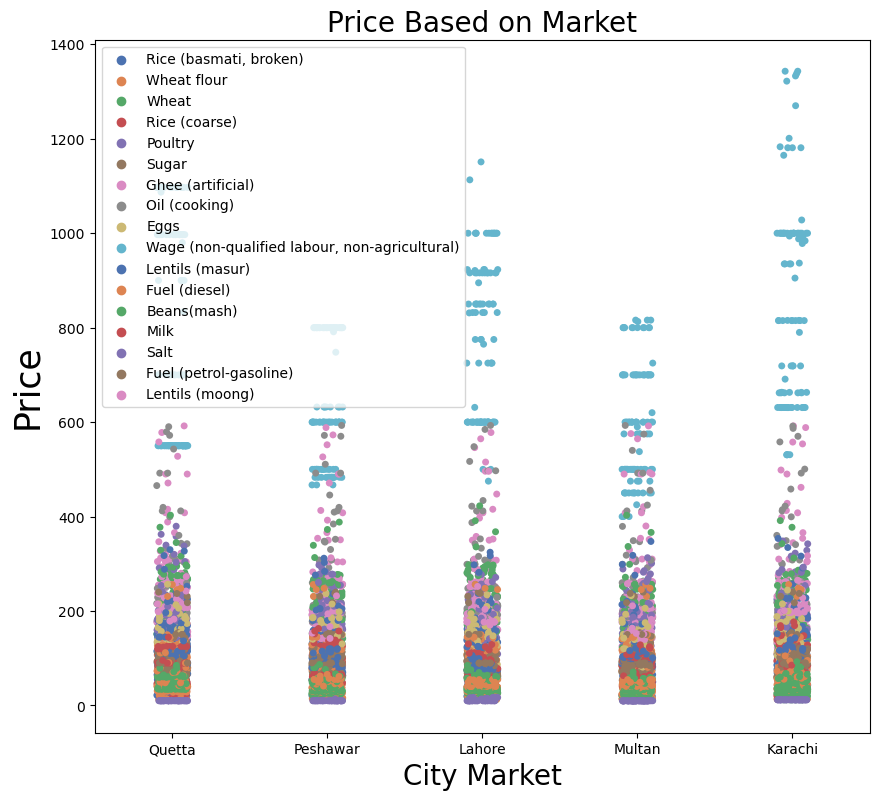

In [854]:
fig = plt.subplots(figsize=(10, 9))
sns.stripplot(x=df["City market"], y=df["price"], hue=df["commodity"],palette="deep")
plt.xlabel("City Market", fontsize=20)
plt.ylabel("Price", fontsize=25)
plt.title("Price Based on Market", fontsize=20)
plt.legend(loc ="upper left")
plt.savefig('Price Based on Market.png')
plt.show()


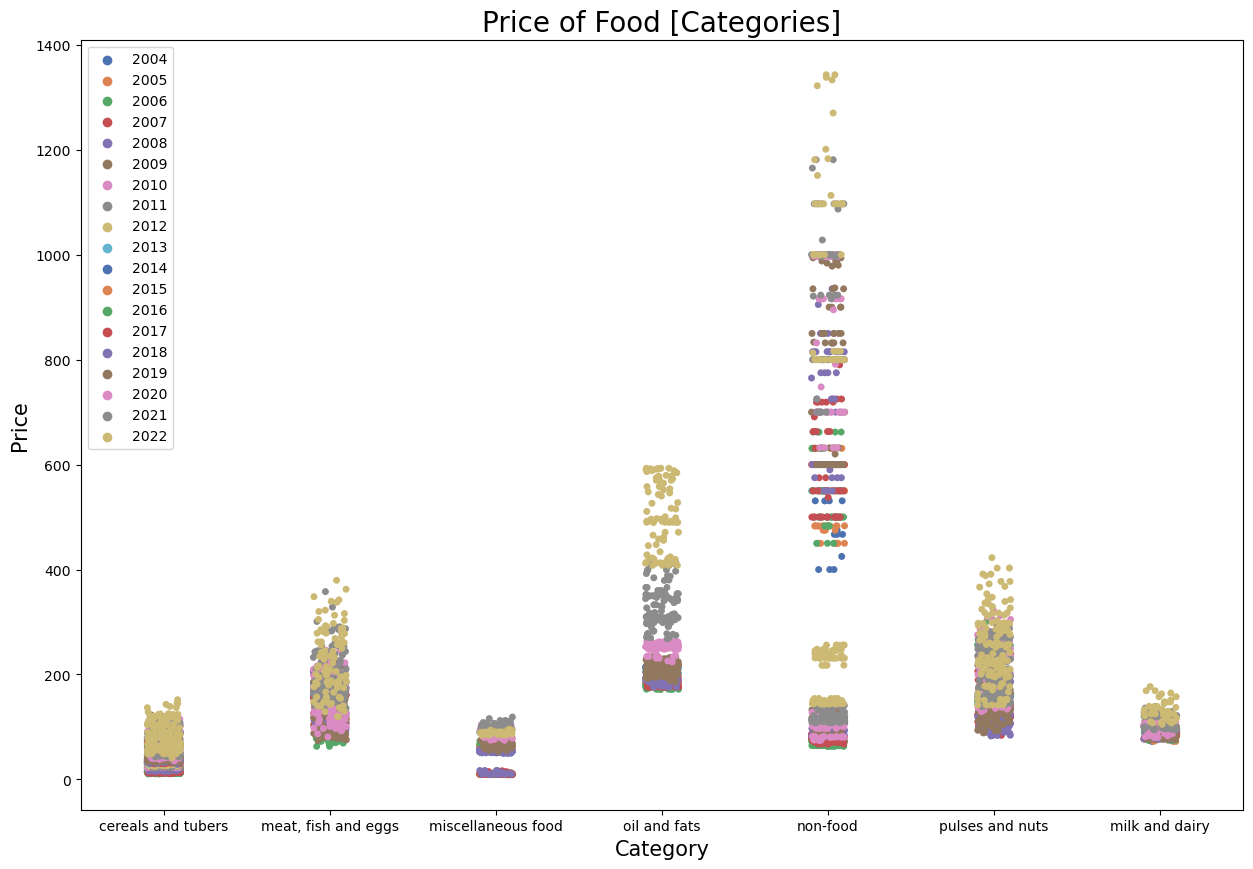

In [855]:
fig = plt.subplots(figsize=(15, 10))
sns.stripplot(x=df["category"], y=df["price"], hue=df["year"],palette="deep")
plt.xlabel("Category", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price of Food [Categories]", fontsize=20)
plt.legend(loc="upper left")
plt.show()

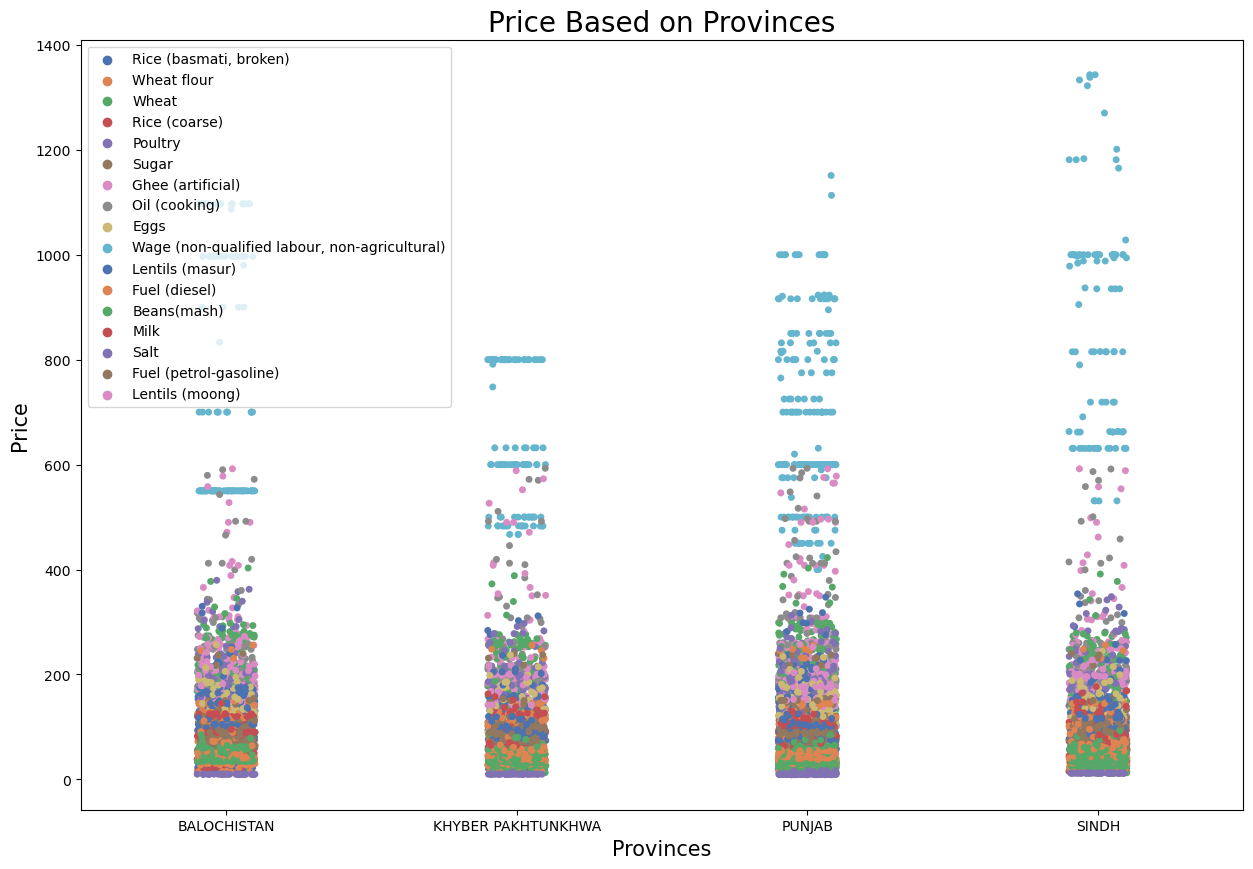

In [856]:
fig = plt.subplots(figsize=(15, 10))
sns.stripplot(x=df["Provinces name"], y=df["price"], hue=df["commodity"],palette="deep")
plt.xlabel("Provinces", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price Based on Provinces", fontsize=20)
plt.legend(loc ="upper left")
plt.savefig('Price based on Provinces.png')
plt.show()

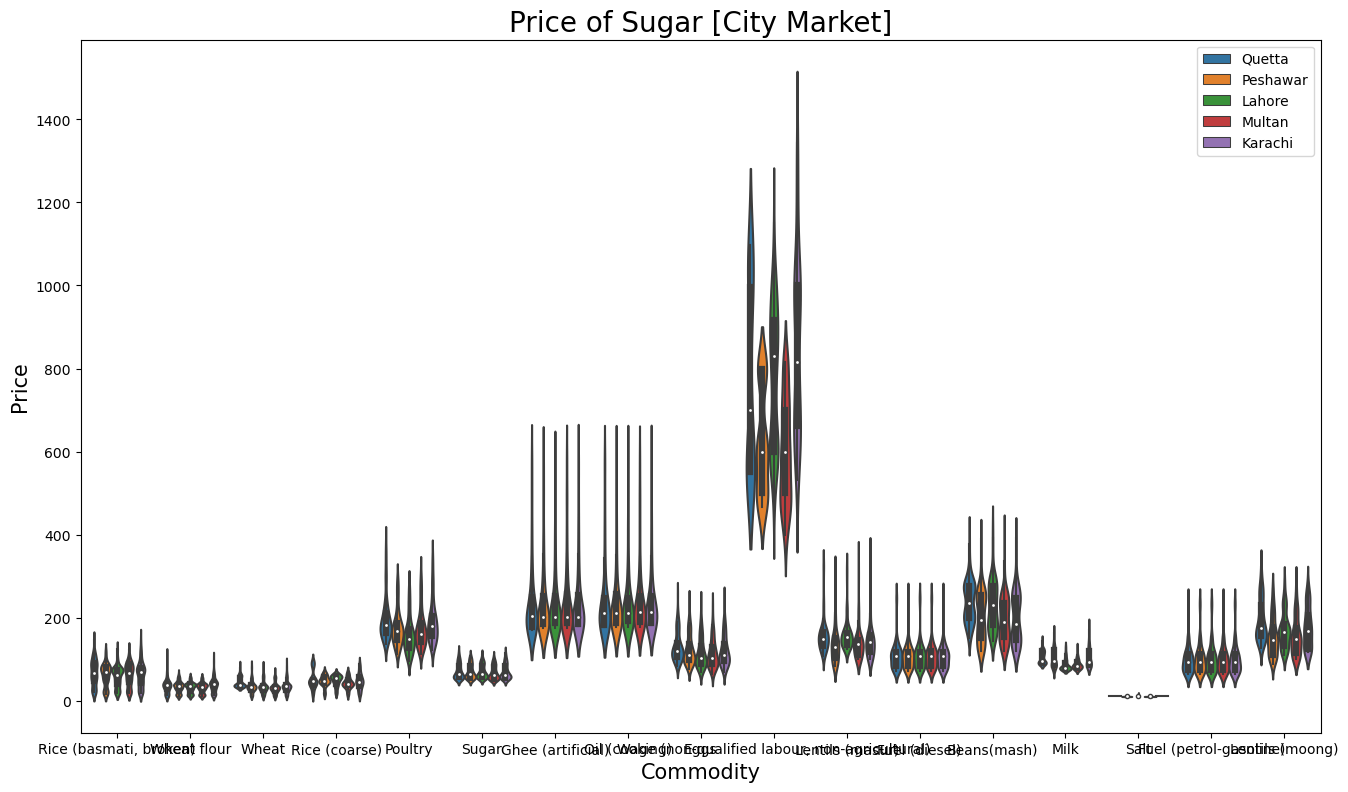

In [857]:
fig = plt.subplots(figsize=(16, 9))

sns.violinplot(x =df["commodity"], y=df["price"], hue=df["City market"])
plt.xticks(rotation=0);
plt.xlabel("Commodity", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price of Sugar [City Market]", fontsize=20)
plt.legend(loc ="upper right")
plt.savefig('Price of Sugar based on City Market.png')

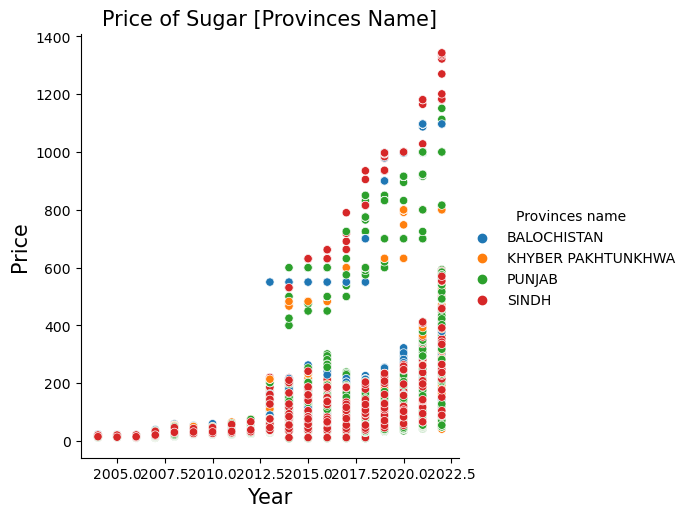

In [858]:
sns.relplot(x = df["year"], y = df["price"], hue=df["Provinces name"])
plt.xlabel("Year", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price of Sugar [Provinces Name]", fontsize=15)
plt.savefig('Price of Sugar by Provinces Name.png')
plt.show()

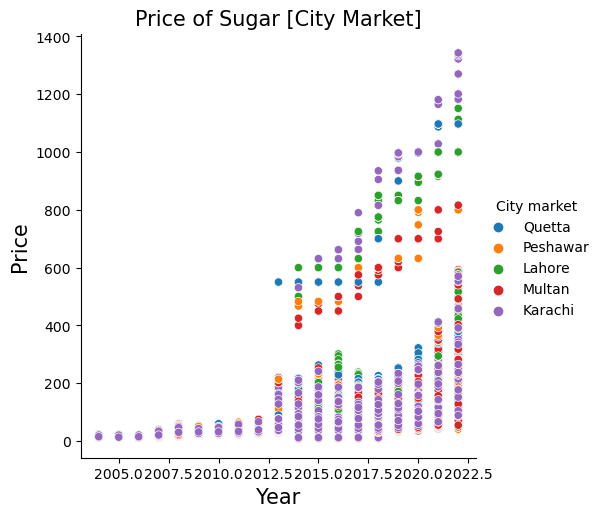

In [859]:
sns.relplot(x = df["year"], y = df["price"], hue = df["City market"])
plt.xlabel("Year", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price of Sugar [City Market]", fontsize=15)
plt.savefig('Price of Sugar by City Market.png')
plt.show()

In [860]:
wage_food_df = df[df["commodity"].str.contains("Wage (non-qualified labour, non-agricultural)", regex=False)]

In [861]:
wage_food_df

date      Provinces name City Name City market   latitude  \
1785   9/15/2013         BALOCHISTAN    Quetta      Quetta  30.187222   
1821  10/15/2013         BALOCHISTAN    Quetta      Quetta  30.187222   
1842  11/15/2013         BALOCHISTAN    Quetta      Quetta  30.187222   
1882   1/15/2014         BALOCHISTAN    Quetta      Quetta  30.187222   
1893   1/15/2014  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
...          ...                 ...       ...         ...        ...   
9656   9/15/2022         BALOCHISTAN    Quetta      Quetta  30.187222   
9671   9/15/2022  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
9686   9/15/2022              PUNJAB    Lahore      Lahore  31.549722   
9701   9/15/2022              PUNJAB    Multan      Multan  30.195556   
9717   9/15/2022               SINDH   Karachi     Karachi  24.905600   

      longitude  category                                      commodity unit  \
1785  67.012500  non-food  Wage (non-qualified labour, non-agricultural)  Day   
1821  67.012500  non-food  Wage (non-qualified labour, non-agricultural)  Day   
1842  67.012500  non-food  Wage (non-qualified labour, non-agricultural)  Day   
1882  67.012500  non-food  Wage (non-qualified labour, non-agricultural)  Day   
1893  71.580182  non-food  Wage (non-qualified labour, non-agricultural)  Day   
...         ...       ...                                            ...  ...   
9656  67.012500  non-food  Wage (non-qualified labour, non-agricultural)  Day   
9671  71.580182  non-food  Wage (non-qualified labour, non-agricultural)  Day   
9686  74.343611  non-food  Wage (non-qualified labour, non-agricultural)  Day   
9701  71.475278  non-food  Wage (non-qualified labour, non-agricultural)  Day   
9717  67.082200  non-food  Wage (non-qualified labour, non-agricultural)  Day   

       price  year  month  day  
1785   550.0  2013      9   15  
1821   550.0  2013     10   15  
1842   550.0  2013     11   15  
1882   550.0  2014      1   15  
1893   467.0  2014      1   15  
...      ...   ...    ...  ...  
9656  1097.0  2022      9   15  
9671   800.0  2022      9   15  
9686  1151.0  2022      9   15  
9701   816.0  2022      9   15  
9717  1343.0  2022      9   15  

[488 rows x 13 columns]

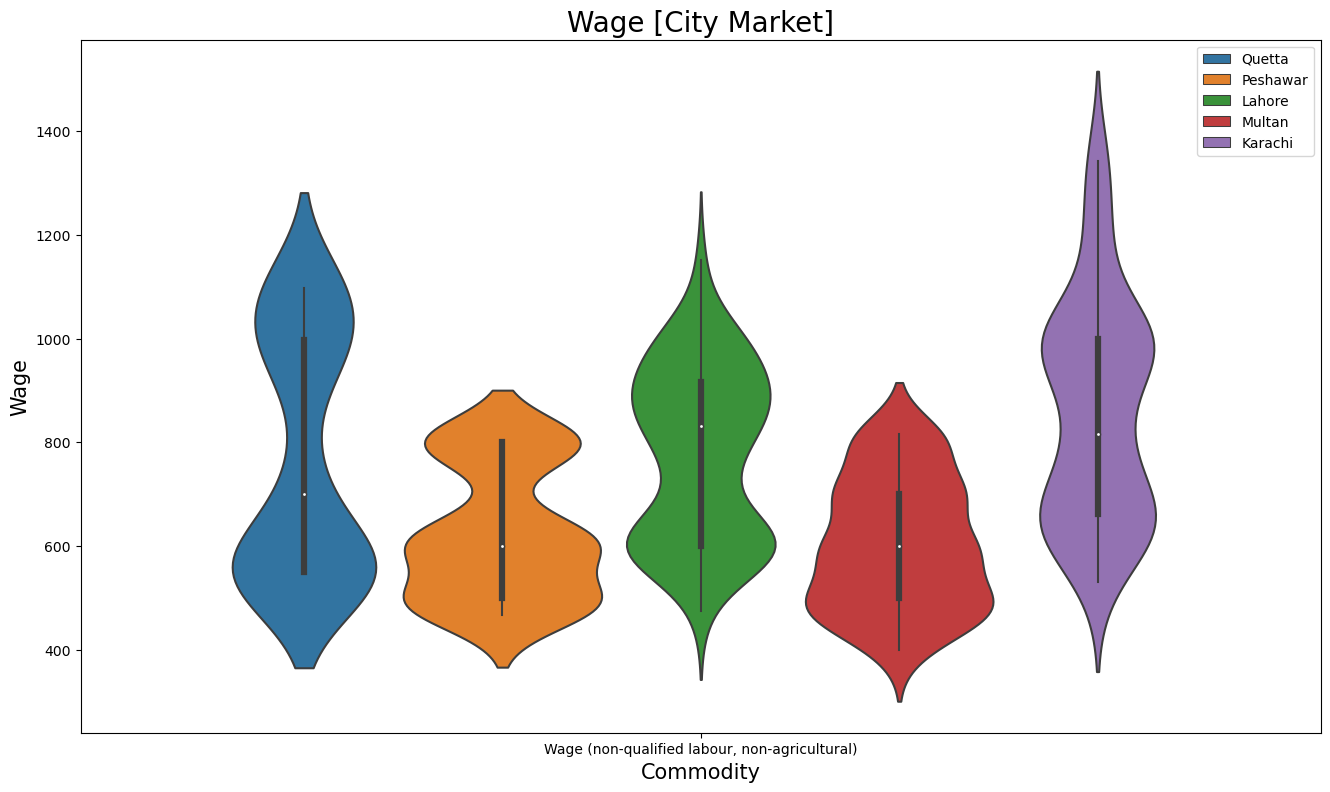

In [862]:
fig = plt.subplots(figsize=(16, 9))
sns.violinplot(x = wage_food_df["commodity"], y = wage_food_df["price"], hue = wage_food_df["City Name"])
plt.xlabel("Commodity", fontsize=15)
plt.ylabel("Wage", fontsize=15)
plt.title("Wage [City Market]", fontsize=20)
plt.legend(loc ="upper right")
plt.savefig('Wages by City Market.png')

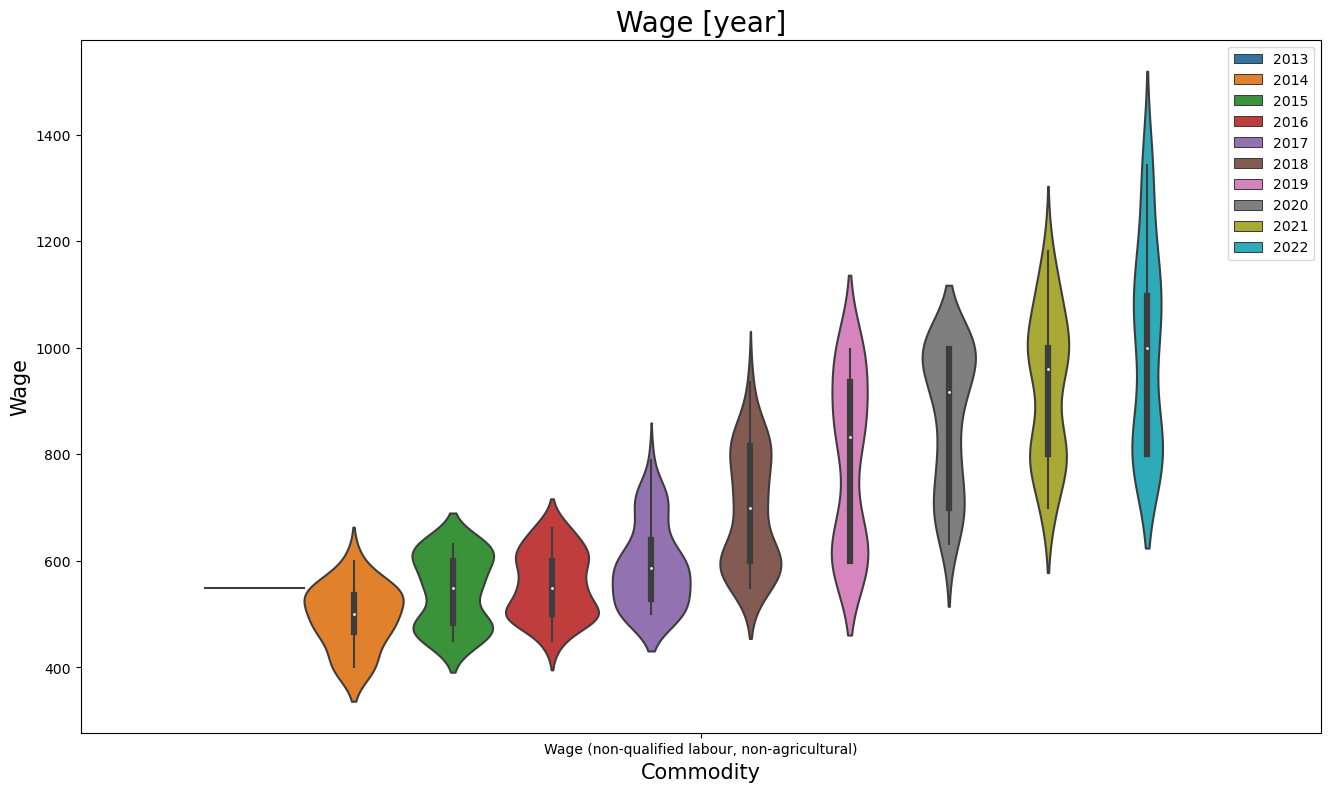

In [863]:
fig = plt.subplots(figsize=(16, 9))
sns.violinplot(x = wage_food_df["commodity"], y = wage_food_df["price"], hue = wage_food_df["year"])
plt.xlabel("Commodity", fontsize=15)
plt.ylabel("Wage", fontsize=15)
plt.title("Wage [year]", fontsize=20)
plt.legend(loc ="upper right");
plt.savefig('Wage per year.png')

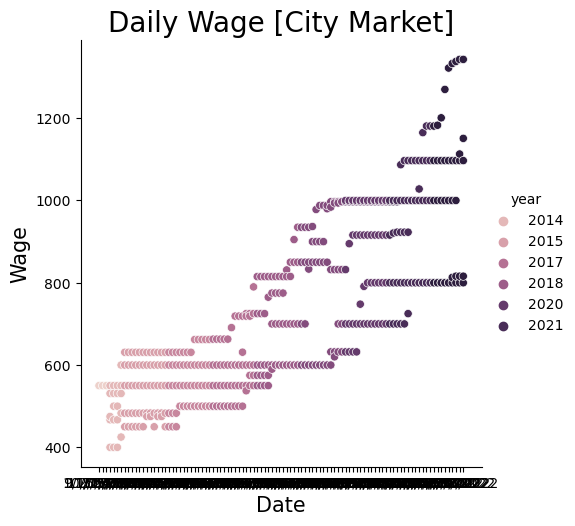

In [864]:
sns.relplot(x =wage_food_df["date"], y=wage_food_df["price"], hue=wage_food_df["year"])
plt.xlabel("Date", fontsize=15)
plt.ylabel("Wage", fontsize=15)
plt.title("Daily Wage [City Market]", fontsize=20)
plt.savefig('Dail wage by city market.png')
plt.show()

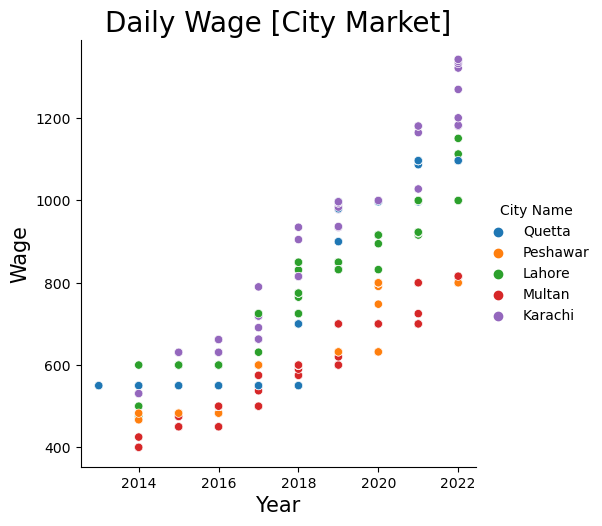

In [865]:
sns.relplot(x =wage_food_df["year"], y=wage_food_df["price"], hue=wage_food_df["City Name"])
plt.xlabel("Year", fontsize=15)
plt.ylabel("Wage", fontsize=15)
plt.title("Daily Wage [City Market]", fontsize=20)
plt.savefig('Daily Wage by City Market.png')
plt.show()

In [866]:
# df.drop(["latitude", "longitude"], axis=1, inplace=True) 
diesel_food_df = df[df["commodity"].str.contains("Fuel (diesel)", regex=False)]
petrol_food_df = df[df["commodity"].str.contains("Fuel (petrol-gasoline)", regex=False)]
print(diesel_food_df["commodity"].unique())
print(petrol_food_df["commodity"].unique())
print("\n", "Diesel Shape", diesel_food_df.shape, "\n", "Gasoline", petrol_food_df.shape, "\n")
print("\n", "Diesel Info", diesel_food_df.info(), "\n", "Gasoline", petrol_food_df.info())

['Fuel (diesel)']
['Fuel (petrol-gasoline)']

 Diesel Shape (525, 13) 
 Gasoline (470, 13) 

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 1881 to 9715
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            525 non-null    object 
 1   Provinces name  525 non-null    object 
 2   City Name       525 non-null    object 
 3   City market     525 non-null    object 
 4   latitude        525 non-null    float64
 5   longitude       525 non-null    float64
 6   category        525 non-null    object 
 7   commodity       525 non-null    object 
 8   unit            525 non-null    object 
 9   price           525 non-null    float64
 10  year            525 non-null    int64  
 11  month           525 non-null    int64  
 12  day             525 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 57.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 2419 to

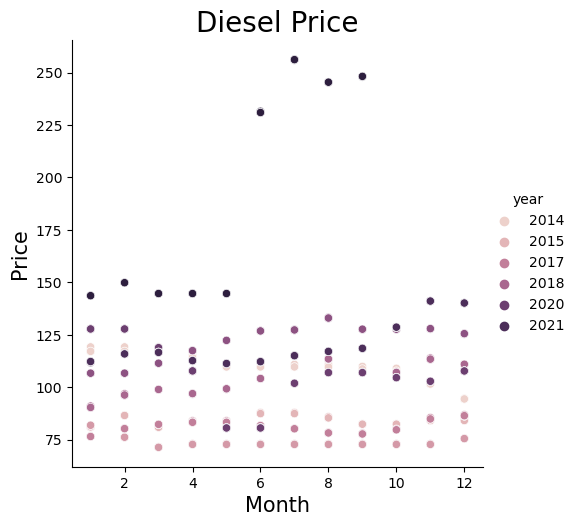

In [867]:
sns.relplot(x = diesel_food_df["month"], y = diesel_food_df["price"], hue = diesel_food_df["year"])
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
plt.title("Diesel Price", fontsize = 20)
plt.savefig('Diesel Price.png')

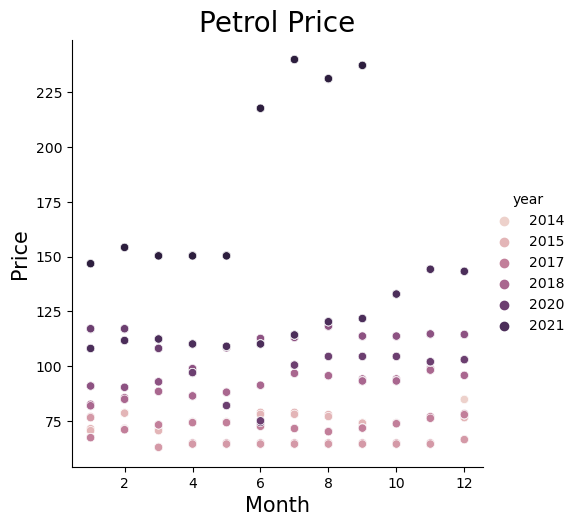

In [868]:
sns.relplot(x = petrol_food_df["month"], y = petrol_food_df["price"], hue = petrol_food_df["year"])
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
plt.title("Petrol Price", fontsize = 20)
plt.savefig('Price of Petrol.png')


AttributeError: 'numpy.int64' object has no attribute 'startswith'

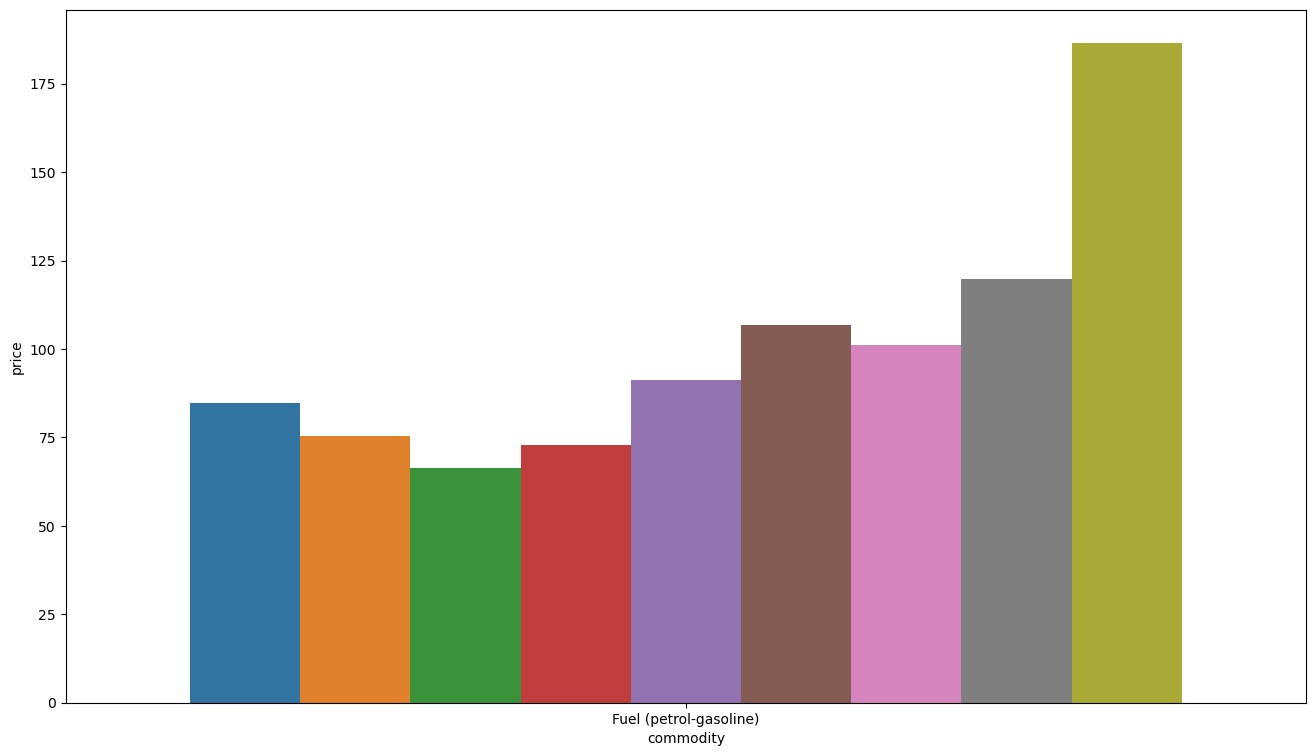

In [869]:
fig = plt.subplots(figsize=(16, 9))
sns.barplot(x=petrol_food_df["commodity"], y = petrol_food_df["price"], hue = petrol_food_df["year"], ci=0 )
plt.xlabel("Commodity [Petrol]", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Petrol Price", fontsize=20)
plt.legend(loc ="upper right")
plt.savefig('Petrol Price.png')

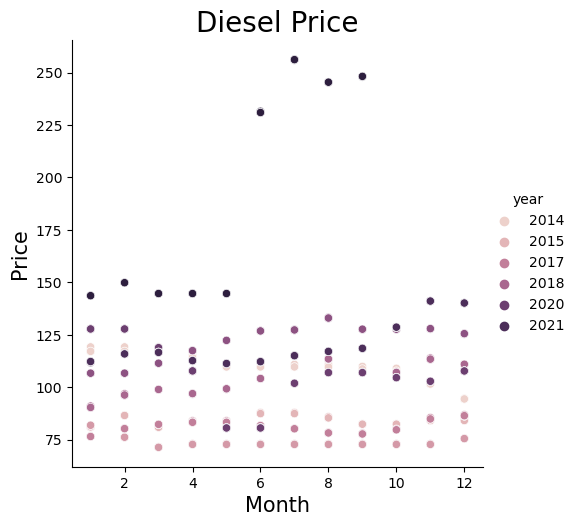

In [870]:
sns.relplot(x = diesel_food_df["month"], y = diesel_food_df["price"], hue = diesel_food_df["year"])
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
plt.title("Diesel Price", fontsize = 20)
plt.savefig('Price of Diesel.png')

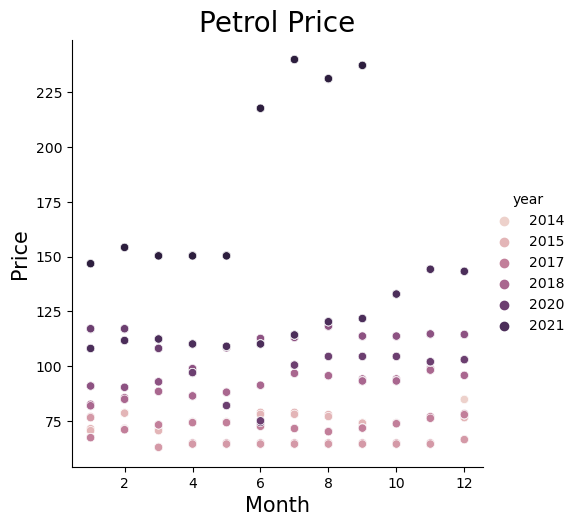

In [871]:
sns.relplot(x = petrol_food_df["month"], y = petrol_food_df["price"], hue = petrol_food_df["year"])
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
plt.title("Petrol Price", fontsize = 20)
plt.savefig('Price of Petrol.png')

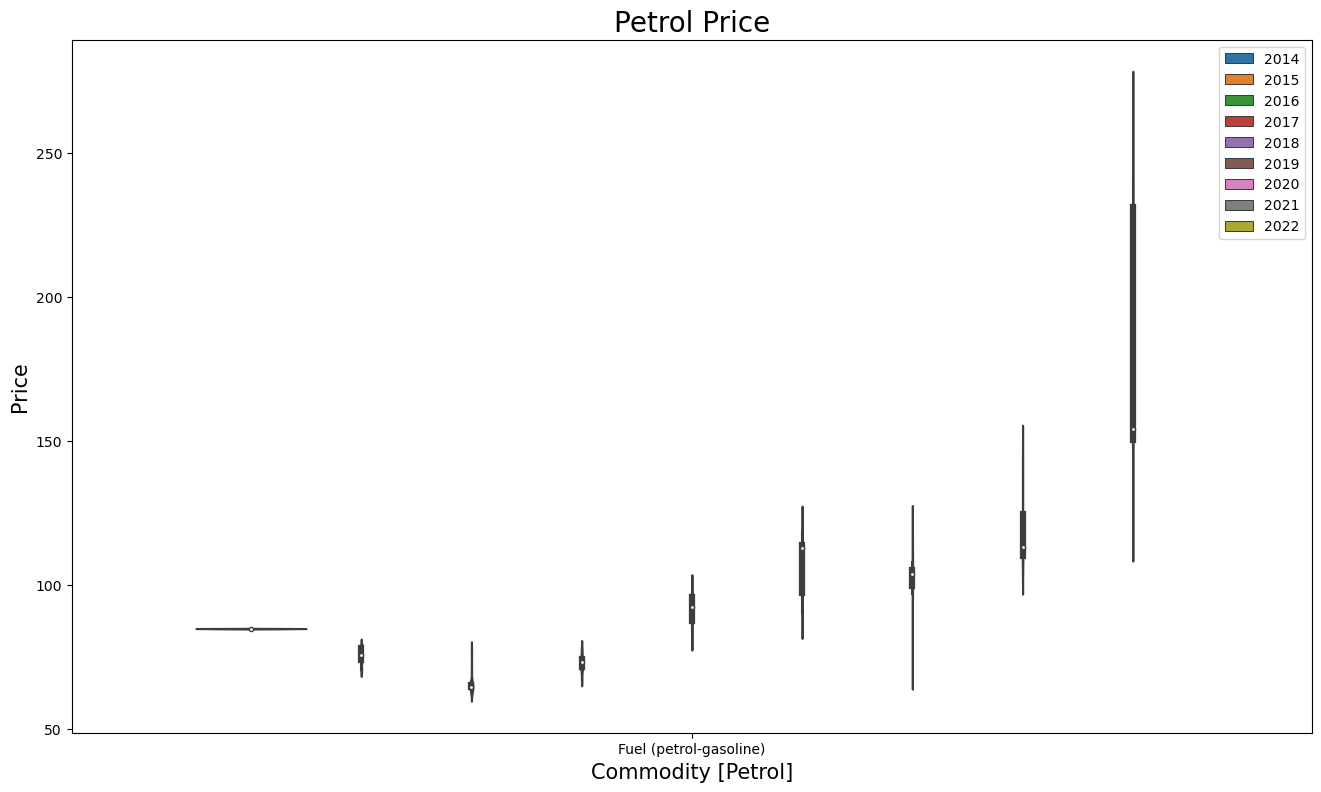

In [872]:
fig = plt.subplots(figsize=(16, 9))
sns.violinplot(x=petrol_food_df["commodity"], y=petrol_food_df["price"], hue=petrol_food_df["year"])
plt.xlabel("Commodity [Petrol]", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Petrol Price", fontsize=20)
plt.legend(loc ="upper right")
plt.savefig('Price of petrol.png')
plt.show()

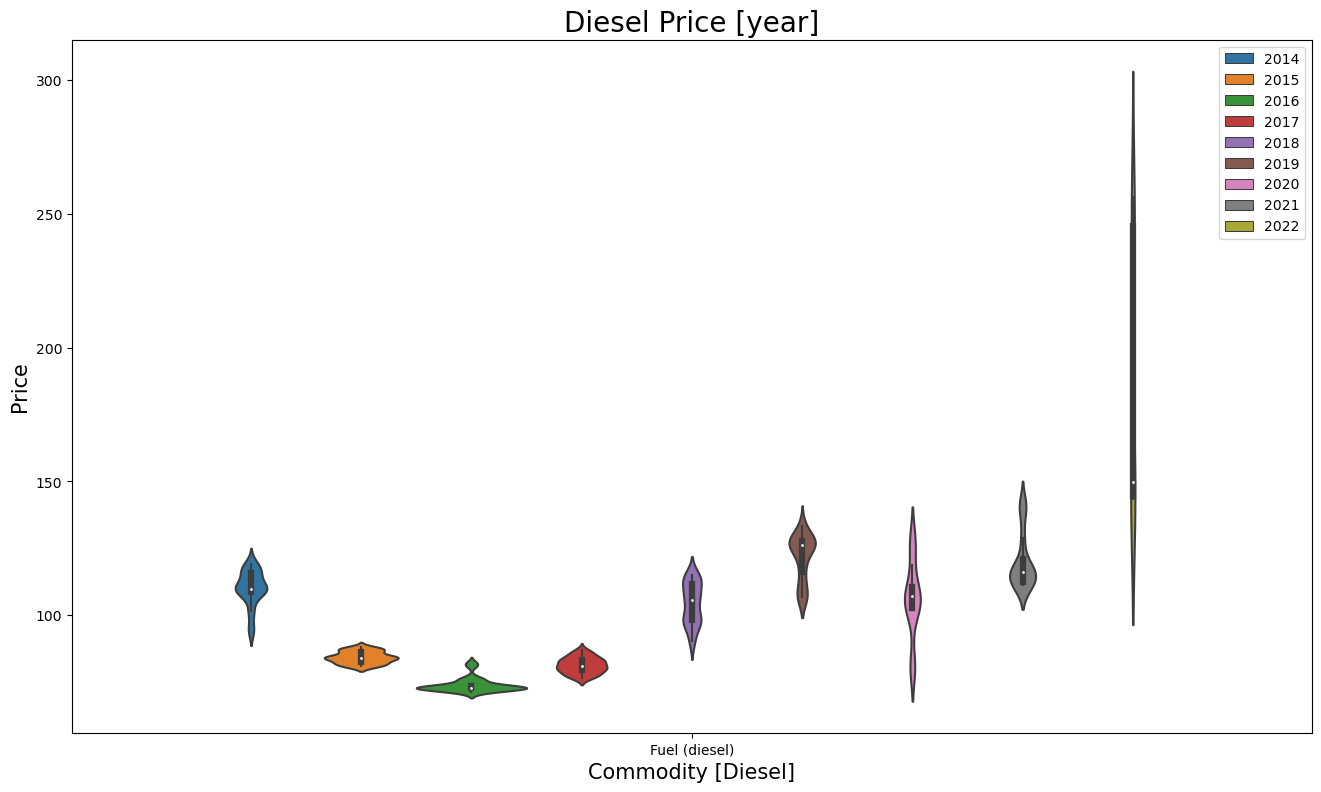

In [873]:
fig = plt.subplots(figsize=(16, 9))
sns.violinplot(x=diesel_food_df["commodity"], y=diesel_food_df["price"], hue=diesel_food_df["year"])
plt.xlabel("Commodity [Diesel]", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Diesel Price [year]", fontsize=20)
plt.legend(loc ="upper right")
plt.savefig('Price of Diesel.png')
plt.show()

In [874]:
df

date      Provinces name City Name City market   latitude  \
0     1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222   
1     1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222   
2     1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
3     1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
4     1/15/2004              PUNJAB    Lahore      Lahore  31.549722   
...         ...                 ...       ...         ...        ...   
9718  9/15/2022               SINDH   Karachi     Karachi  24.905600   
9719  9/15/2022               SINDH   Karachi     Karachi  24.905600   
9720  9/15/2022               SINDH   Karachi     Karachi  24.905600   
9721  9/15/2022               SINDH   Karachi     Karachi  24.905600   
9722  9/15/2022               SINDH   Karachi     Karachi  24.905600   

      longitude            category               commodity unit   price  \
0     67.012500  cereals and tubers  Rice (basmati, broken)   KG   20.00   
1     67.012500  cereals and tubers             Wheat flour   KG   13.00   
2     71.580182  cereals and tubers  Rice (basmati, broken)   KG   17.59   
3     71.580182  cereals and tubers             Wheat flour   KG   12.00   
4     74.343611  cereals and tubers  Rice (basmati, broken)   KG   19.15   
...         ...                 ...                     ...  ...     ...   
9718  67.082200        oil and fats       Ghee (artificial)   KG  553.86   
9719  67.082200        oil and fats           Oil (cooking)    L  569.99   
9720  67.082200     pulses and nuts             Beans(mash)   KG  391.45   
9721  67.082200     pulses and nuts         Lentils (masur)   KG  334.50   
9722  67.082200     pulses and nuts         Lentils (moong)   KG  265.08   

      year  month  day  
0     2004      1   15  
1     2004      1   15  
2     2004      1   15  
3     2004      1   15  
4     2004      1   15  
...    ...    ...  ...  
9718  2022      9   15  
9719  2022      9   15  
9720  2022      9   15  
9721  2022      9   15  
9722  2022      9   15  

[9723 rows x 13 columns]

In [875]:
non_food_df = df[df["category"].str.contains("non-food", regex=True)]
non_food_df.drop(["latitude", "longitude"], axis=1, inplace=True)
non_food_df.head()

date Provinces name City Name City market  category  \
1785   9/15/2013    BALOCHISTAN    Quetta      Quetta  non-food   
1821  10/15/2013    BALOCHISTAN    Quetta      Quetta  non-food   
1842  11/15/2013    BALOCHISTAN    Quetta      Quetta  non-food   
1881   1/15/2014    BALOCHISTAN    Quetta      Quetta  non-food   
1882   1/15/2014    BALOCHISTAN    Quetta      Quetta  non-food   

                                          commodity unit  price  year  month  \
1785  Wage (non-qualified labour, non-agricultural)  Day  550.0  2013      9   
1821  Wage (non-qualified labour, non-agricultural)  Day  550.0  2013     10   
1842  Wage (non-qualified labour, non-agricultural)  Day  550.0  2013     11   
1881                                  Fuel (diesel)    L  117.1  2014      1   
1882  Wage (non-qualified labour, non-agricultural)  Day  550.0  2014      1   

      day  
1785   15  
1821   15  
1842   15  
1881   15  
1882   15

In [876]:
non_food = non_food_df[["Provinces name", "City Name", "City market","category", 
                        "commodity", "unit"]]

for i in non_food.columns:
    print("\n", non_food[i].unique())  


 ['BALOCHISTAN' 'KHYBER PAKHTUNKHWA' 'PUNJAB' 'SINDH']

 ['Quetta' 'Peshawar' 'Lahore' 'Multan' 'Karachi']

 ['Quetta' 'Peshawar' 'Lahore' 'Multan' 'Karachi']

 ['non-food']

 ['Wage (non-qualified labour, non-agricultural)' 'Fuel (diesel)'
 'Fuel (petrol-gasoline)']

 ['Day' 'L']


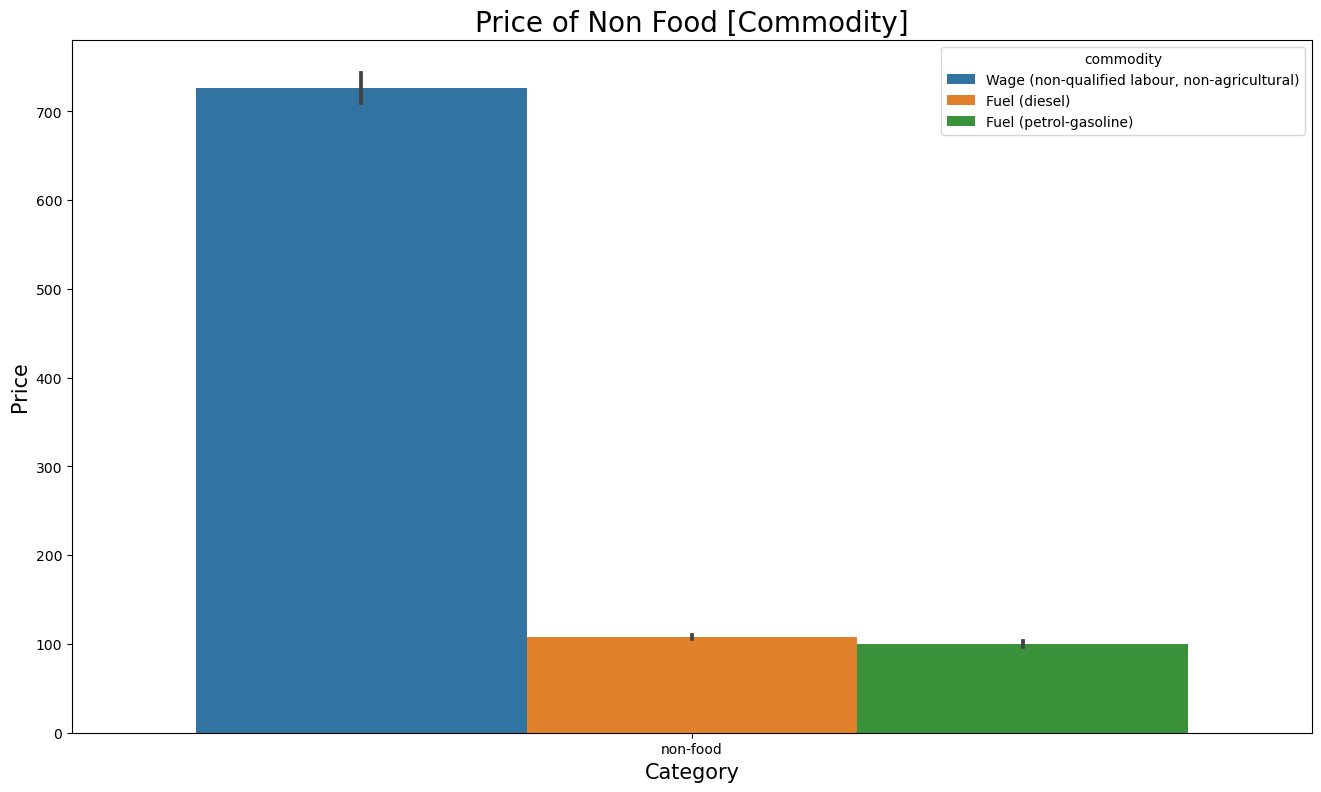

In [877]:
fig = plt.subplots(figsize=(16, 9))
sns.barplot(x=non_food_df["category"], y=non_food_df["price"], hue=non_food_df["commodity"])
plt.xlabel("Category", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price of Non Food [Commodity]", fontsize=20)
plt.savefig('Price of Non Food Commodity.png')
plt.show()


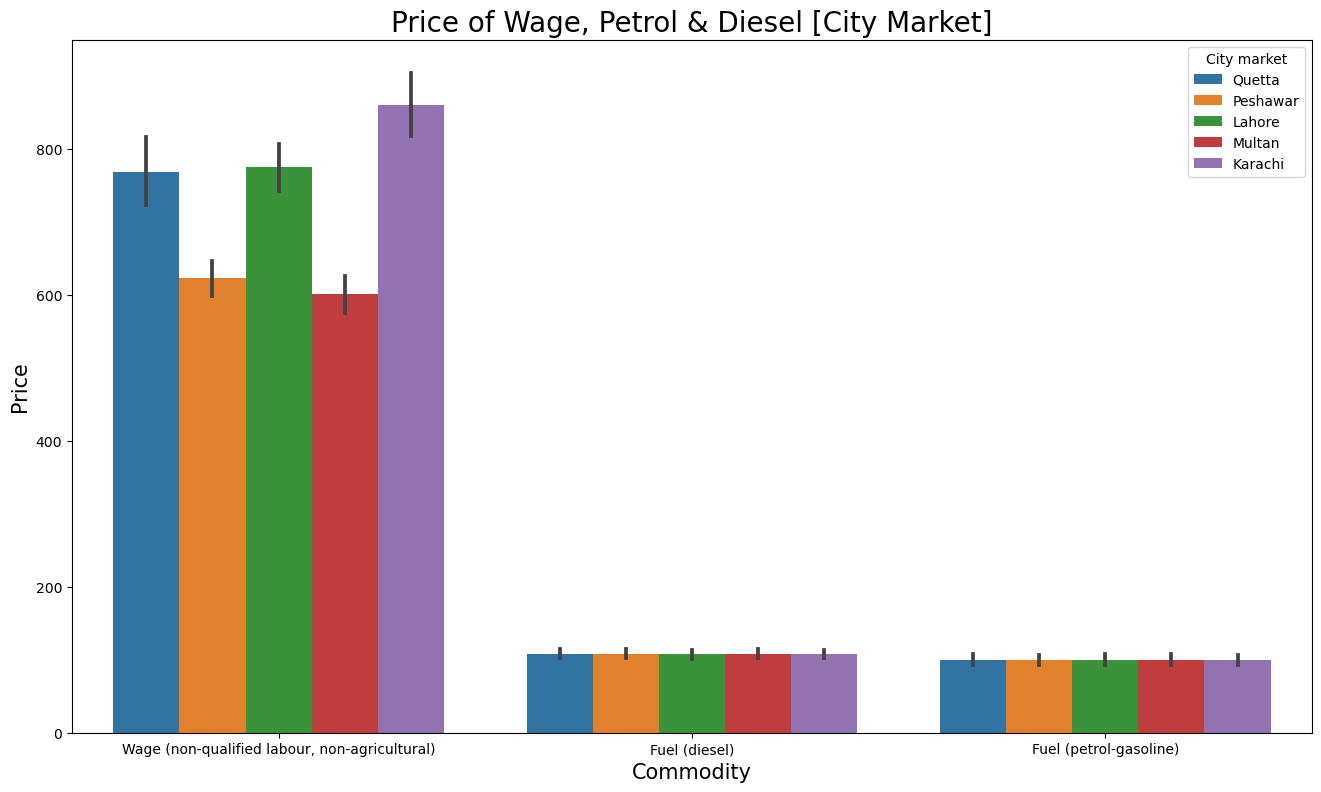

In [878]:
fig = plt.subplots(figsize=(16, 9))
sns.barplot(x=non_food_df["commodity"], y=non_food_df["price"], hue=non_food_df["City market"])
plt.xlabel("Commodity", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price of Wage, Petrol & Diesel [City Market]", fontsize=20)
plt.savefig('Price of Wage, Petrol & Diesel [City Market].png')
plt.show()

In [879]:
df

date      Provinces name City Name City market   latitude  \
0     1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222   
1     1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222   
2     1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
3     1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
4     1/15/2004              PUNJAB    Lahore      Lahore  31.549722   
...         ...                 ...       ...         ...        ...   
9718  9/15/2022               SINDH   Karachi     Karachi  24.905600   
9719  9/15/2022               SINDH   Karachi     Karachi  24.905600   
9720  9/15/2022               SINDH   Karachi     Karachi  24.905600   
9721  9/15/2022               SINDH   Karachi     Karachi  24.905600   
9722  9/15/2022               SINDH   Karachi     Karachi  24.905600   

      longitude            category               commodity unit   price  \
0     67.012500  cereals and tubers  Rice (basmati, broken)   KG   20.00   
1     67.012500  cereals and tubers             Wheat flour   KG   13.00   
2     71.580182  cereals and tubers  Rice (basmati, broken)   KG   17.59   
3     71.580182  cereals and tubers             Wheat flour   KG   12.00   
4     74.343611  cereals and tubers  Rice (basmati, broken)   KG   19.15   
...         ...                 ...                     ...  ...     ...   
9718  67.082200        oil and fats       Ghee (artificial)   KG  553.86   
9719  67.082200        oil and fats           Oil (cooking)    L  569.99   
9720  67.082200     pulses and nuts             Beans(mash)   KG  391.45   
9721  67.082200     pulses and nuts         Lentils (masur)   KG  334.50   
9722  67.082200     pulses and nuts         Lentils (moong)   KG  265.08   

      year  month  day  
0     2004      1   15  
1     2004      1   15  
2     2004      1   15  
3     2004      1   15  
4     2004      1   15  
...    ...    ...  ...  
9718  2022      9   15  
9719  2022      9   15  
9720  2022      9   15  
9721  2022      9   15  
9722  2022      9   15  

[9723 rows x 13 columns]

In [880]:
columns_to_drop = ['date','latitude','longitude','City market','City Name','unit','day','month','year']

In [881]:
df = df.drop(columns=columns_to_drop)

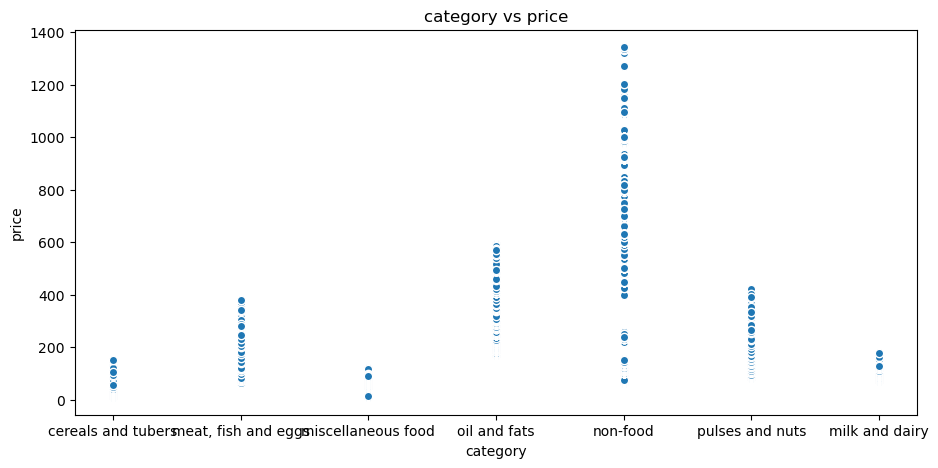

In [882]:
plt.figure(figsize=(50,5))
plt.subplot(1,4,1)
plt.scatter(x=df['category'],y=df['price'],edgecolors='white')
plt.title('category vs price')
plt.xlabel('category')
plt.ylabel('price')
plt.savefig("category vs price.png")

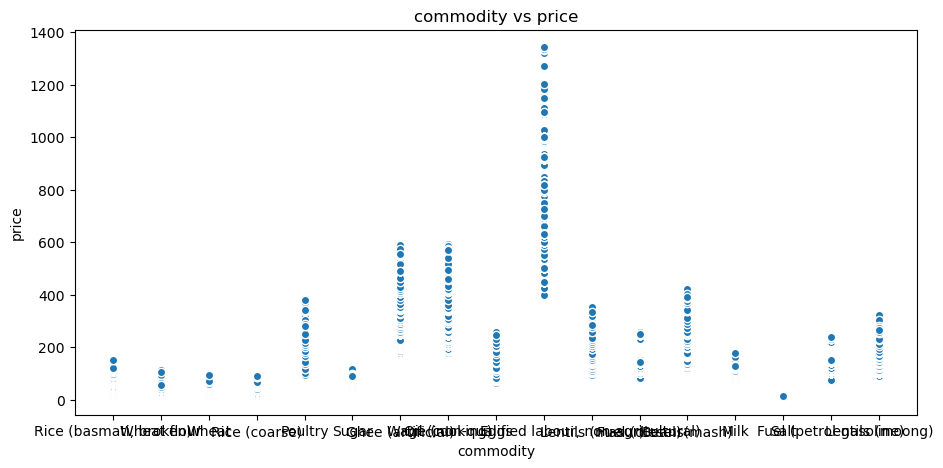

In [883]:
plt.figure(figsize=(50,5))
plt.subplot(1,4,1)
plt.scatter(x=df['commodity'],y=df['price'],edgecolors='white')
plt.title('commodity vs price')
plt.xlabel('commodity')
plt.ylabel('price')
plt.savefig("commodity vs price")

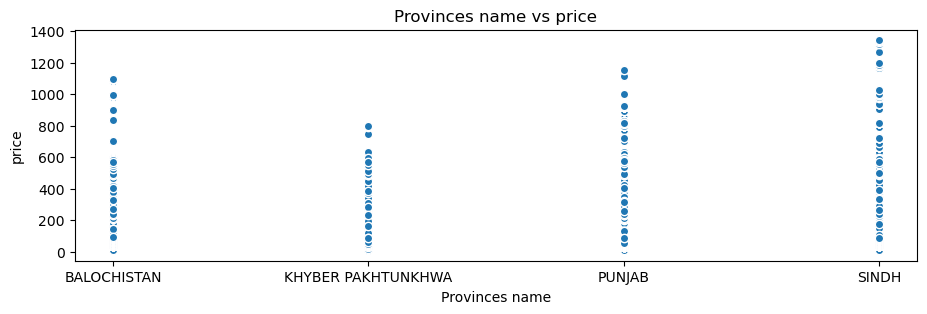

In [884]:
plt.figure(figsize=(50,3))
plt.subplot(1,4,1)
plt.scatter(x=df['Provinces name'],y=df['price'],edgecolors='white')
plt.title('Provinces name vs price')
plt.xlabel('Provinces name')
plt.ylabel('price')
plt.savefig("provinces names vs price")

## Choosing Machine Learning Model

## Choose
As you can see that one  realtion is not enough to predict the Price. So, we have to use Multivarible Model  

In [907]:
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score



In [908]:
le = LabelEncoder()

In [909]:
y=df['price']
x=df.drop("price",axis=1)


In [910]:
le.fit(np.unique(x))
x

Provinces name            category               commodity
0            BALOCHISTAN  cereals and tubers  Rice (basmati, broken)
1            BALOCHISTAN  cereals and tubers             Wheat flour
2     KHYBER PAKHTUNKHWA  cereals and tubers  Rice (basmati, broken)
3     KHYBER PAKHTUNKHWA  cereals and tubers             Wheat flour
4                 PUNJAB  cereals and tubers  Rice (basmati, broken)
...                  ...                 ...                     ...
9718               SINDH        oil and fats       Ghee (artificial)
9719               SINDH        oil and fats           Oil (cooking)
9720               SINDH     pulses and nuts             Beans(mash)
9721               SINDH     pulses and nuts         Lentils (masur)
9722               SINDH     pulses and nuts         Lentils (moong)

[9723 rows x 3 columns]

In [911]:
x= pd.DataFrame(le.transform(samp) for samp in x.values)

In [912]:
x

0   1   2
0      0  21  13
1      0  21  20
2      6  21  13
3      6  21  20
4     11  21  13
...   ..  ..  ..
9718  15  26   5
9719  15  26  10
9720  15  27   1
9721  15  27   7
9722  15  27   8

[9723 rows x 3 columns]

In [913]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .75)

In [914]:
X_train.shape

(7292, 3)

In [915]:
X_test.shape

(2431, 3)

In [916]:
y_test.values.reshape

<function ndarray.reshape>

In [917]:
y_test

1651     51.54
8360     90.00
7643    259.29
2774     41.00
1332     33.40
         ...  
378      20.25
412      12.80
737      32.50
3932    166.43
9315    107.69
Name: price, Length: 2431, dtype: float64

In [918]:
y_train.values.reshape

<function ndarray.reshape>

In [919]:
y_train

2000     42.00
6069    186.00
1590     66.69
971      27.38
4558     60.27
         ...  
7891     56.90
9225    144.63
4859     85.00
3264     54.18
2732     57.84
Name: price, Length: 7292, dtype: float64

# Support Vector Machine

In [950]:
# Create a Random Forest Regressor
support_vector = svm.SVR()

# Train the model
support_vector.fit(X_test, y_test)

# Make predictions on the test set
y_pred = support_vector.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE)',rmse)
print("Mean Square Error", mse)
print("Mean Absolute Error", mae)
print("R 2 Score", r2*100)
print("Explained Variance Score", evs*100)

Root Mean Squared Error (RMSE) 168.27522045869281
Mean Square Error 28316.549820421667
Mean Absolute Error 73.80155126261897
R 2 Score -3.293660240778906
Explained Variance Score 5.044238002384304


# Linear Regression

In [949]:
# Create a Linear Regressor
linear_regression = LinearRegression()

# Train the model
linear_regression.fit(X_test, y_test)

# Make predictions on the test set
y_pred = linear_regression.predict(X_test)

# Make predictions on the test set
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE)',rmse)
print("Mean Square Error", mse)
print("Mean Absolute Error", mae)
print("R2 Score", r2*100)
print("Explained Variance Score", evs*100)

Root Mean Squared Error (RMSE) 142.53273347325083
Mean Square Error 20315.580111356754
Mean Absolute Error 90.61382136081875
R2 Score 25.892432414085633
Explained Variance Score 25.89243241408562


## MLPRegressor

In [948]:
# Create an MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the model
nn.fit(X_test, y_test)

# Make predictions on the test set
y_pred = nn.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE)',rmse)
print("Mean Square Error", mse)
print("Mean Absolute Error", mae)
print("R2 Score", r2*100)
print("Explained Variance Score", evs*100)

Root Mean Squared Error (RMSE) 141.88188520159466
Mean Square Error 20130.469348358485
Mean Absolute Error 84.17868674757146
R2 Score 26.56768304953787
Explained Variance Score 26.626812180771132


## AdaBoostRegressor

In [947]:
# Create an AdaBoostRegressor with a base estimator (e.g., DecisionTreeRegressor)
base_estimator = DecisionTreeRegressor(max_depth=1)
adaboost_regressor = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Train the model
adaboost_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_regressor.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
rmse = np.sqrt(mse)

print('Root Mean Squared Error (RMSE)',rmse)
print("Mean Square Error", mse)
print("Mean Absolute Error", mae)
print("R2 Score", r2*100)
print("Explained Variance Score", evs*100)

Root Mean Squared Error (RMSE) 120.62228310308092
Mean Square Error 14549.7351809998
Mean Absolute Error 73.7212194207669
R2 Score 46.925193503072
Explained Variance Score 46.96202967637013


## Random Forest Regressor

In [946]:
# Create a Random Forest Regressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE)',rmse)
print("Mean Square Error", mse)
print("Mean Absolute Error", mae)
print("R2 Score", r2*100)
print("Explained Variance Score", evs*100)


Root Mean Squared Error (RMSE) 59.30947709463605
Mean Square Error 3517.614073239158
Mean Absolute Error 34.92137966193879
R2 Score 87.16837908418825
Explained Variance Score 87.20058331486858


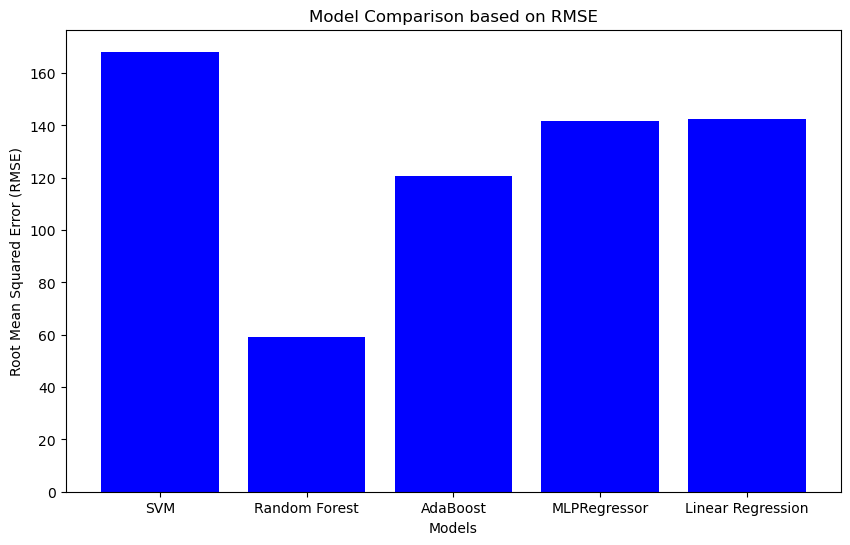

In [962]:
import matplotlib.pyplot as plt

# Assuming you have a list of model names and their corresponding RMSE values
model_names = ['SVM', 'Random Forest', 'AdaBoost', 'MLPRegressor', 'Linear Regression']
rmse_values = [168.2, 59.3, 120.6, 141.8, 142.5]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color='blue')
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Model Comparison based on RMSE')
plt.show()


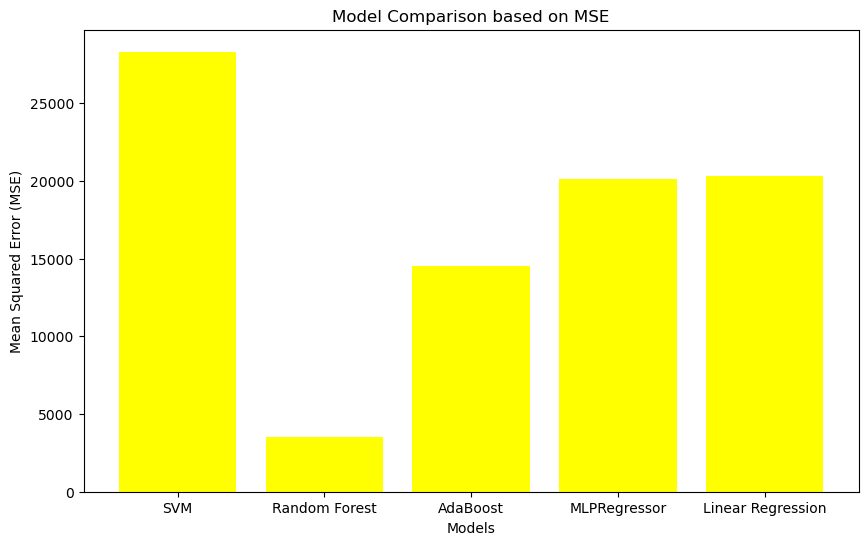

<Figure size 640x480 with 0 Axes>

In [963]:
import matplotlib.pyplot as plt

# Assuming you have a list of model names and their corresponding RMSE values
model_names = ['SVM', 'Random Forest', 'AdaBoost', 'MLPRegressor', 'Linear Regression']
rmse_values = [28316.5, 3517.6, 14549.7, 20130.5, 20315.5]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color='yellow')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Comparison based on MSE')
plt.show()
plt.savefig("MSE.png")


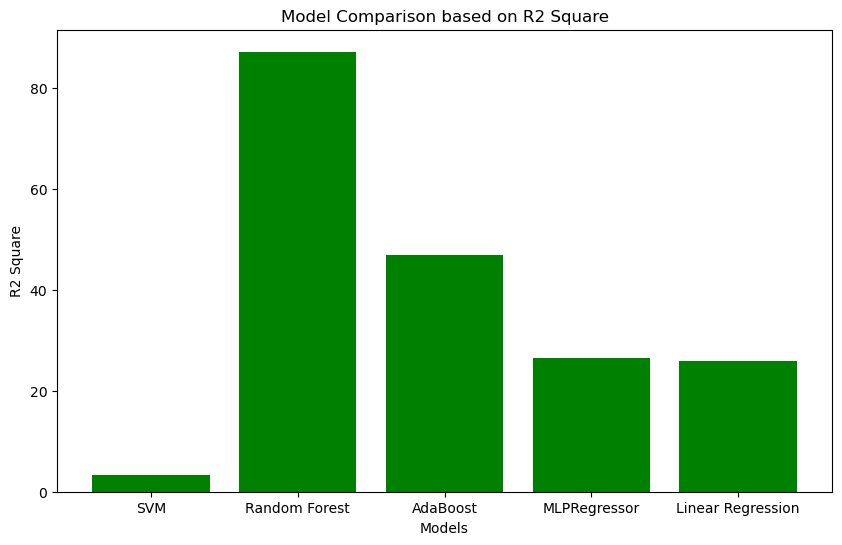

<Figure size 640x480 with 0 Axes>

In [964]:
import matplotlib.pyplot as plt

# Assuming you have a list of model names and their corresponding RMSE values
model_names = ['SVM', 'Random Forest', 'AdaBoost', 'MLPRegressor', 'Linear Regression']
r2_values = [3.29, 87.1, 46.92, 26.5, 25.8]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values, color='green')
plt.xlabel('Models')
plt.ylabel('R2 Square')
plt.title('Model Comparison based on R2 Square')
plt.show()
plt.savefig("R2 Sqauare.png")

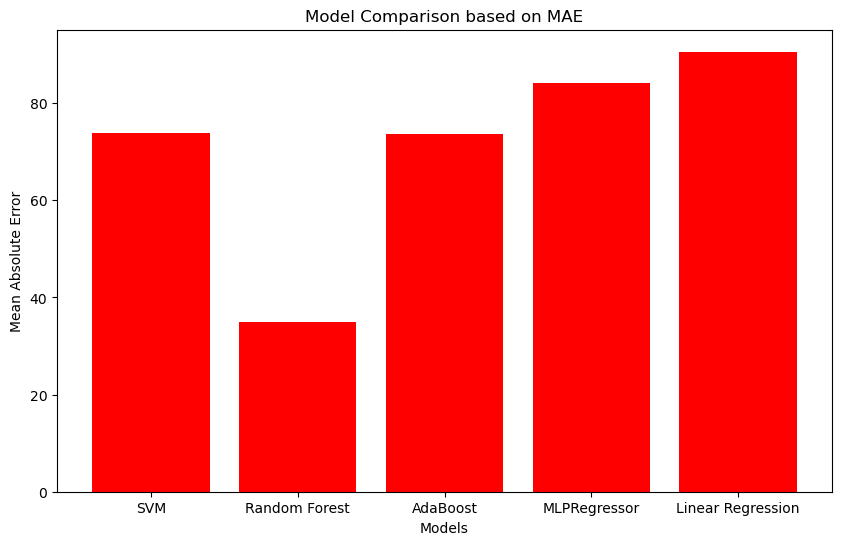

<Figure size 640x480 with 0 Axes>

In [965]:
import matplotlib.pyplot as plt

# Assuming you have a list of model names and their corresponding RMSE values
model_names = ['SVM', 'Random Forest', 'AdaBoost', 'MLPRegressor', 'Linear Regression']
mae_values = [73.8, 34.9, 73.7, 84.1, 90.6]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, mae_values, color='Red')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Model Comparison based on MAE')
plt.show()
plt.savefig("MAE.png")

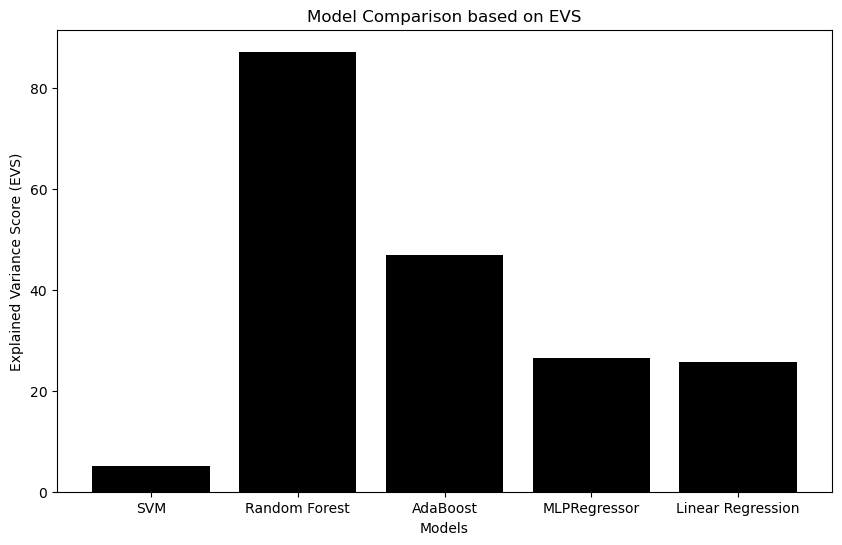

<Figure size 640x480 with 0 Axes>

In [966]:
import matplotlib.pyplot as plt

# Assuming you have a list of model names and their corresponding RMSE values
model_names = ['SVM', 'Random Forest', 'AdaBoost', 'MLPRegressor', 'Linear Regression']
rmse_values = [5.04, 87.20, 46.96, 26.6, 25.8]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color='black')
plt.xlabel('Models')
plt.ylabel('Explained Variance Score (EVS)')
plt.title('Model Comparison based on EVS')
plt.show()
plt.savefig("EVS.png")